# Machine Learning: AllLife Bank Personal Loan Campaign

![bank image](bank-image.jpg)

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores


from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
# load google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Loading the dataset

In [ ]:
Loan = pd.read_csv("/content/drive/MyDrive/Data Analytics Science/UnivTex_AIML/Project Folder/Personal Loan Campaign/Loan_Modelling.csv")

In [ ]:
# Create a copy of the data to protect it from accidental changes
df = Loan.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
print("There are", df.shape[0], "rows and", df.shape[1], "columns.")

There are 5000 rows and 14 columns.


There are

In [ ]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
# Look at a random sample of the data
df.sample(n=10, random_state=1)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
2764  2765   31           5      84    91320       1    2.9          3   
4767  4768   35           9      45    90639       3    0.9          1   
3814  3815   34           9      35    94304       3    1.3          1   
3499  3500   49          23     114    94550       1    0.3          1   
2735  2736   36          12      70    92131       3    2.6          2   
3922  3923   31           4      20    95616       4    1.5          2   
2701  2702   50          26      55    94305       1    1.6          2   
1179  1180   36          11      98    90291       3    1.2          3   
932    933   51          27     112    94720       3    1.8          2   
792    793   41          16      98    93117       1    4.0          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
2764       105              0                   0           0       0   
4767       101              0                   1           0       0   
3814         0              0                   0           0       0   
3499       286              0                   0           0       1   
2735       165              0                   0           0       1   
3922         0              0                   0           0       1   
2701         0              0                   0           0       1   
1179         0              0                   1           0       0   
932          0              0                   1           1       1   
792          0              0                   0           0       0   

      CreditCard  
2764           1  
4767           0  
3814           0  
3499           0  
2735           0  
3922           0  
2701           0  
1179           1  
932            1  
792            1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [ ]:
# Are there any duplicates in this dataset
df.duplicated().sum()


0

In [ ]:
# Drop the ID column in our copy data
df.drop(["ID"], axis=1, inplace=True)


# Feature Engineering/ Data Processing

The Zipcode column isn't truely numeric in the normal sense that we'd do mathmatical calculations on it, so we need to make it a categorical value instead.

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# Find the number of uniques in the zip code
df["ZIPCode"].nunique()

467

In [ ]:
# Convert the Zipcode column into a str
df["ZIPCode"] = df["ZIPCode"].astype(str)
print(
    "Number of unique values by the first three digits of ZIPCode: ",
    df["ZIPCode"].str[0:2].nunique(),
)
# Compress the Zipcode column down to its first 3 digits
df["ZIPCode"] = df["ZIPCode"].str[0:2]

# Convert the Zipcode column to a category variable
df["ZIPCode"] = df["ZIPCode"].astype("category")

Number of unique values by the first three digits of ZIPCode:  7


In [ ]:
# Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
df[cat_cols] = df[cat_cols].astype("category")

In [ ]:
# How many rows in the Experience column have negative values
(df['Experience'] < 0).sum()


52

In [ ]:
# How many rows have -1, -2, -3 in the experience column
((df['Experience'] == -1)).sum()


33

In [ ]:
((df['Experience'] == -2)).sum()

15

In [ ]:
((df['Experience'] == -3)).sum()

4

In [ ]:
# Treat the negative values by replacing them with their absolute value
df["Experience"].replace(-1, 1, inplace=True)
df["Experience"].replace(-2, 2, inplace=True)
df["Experience"].replace(-3, 3, inplace=True)

Observation: These error represent less than 1% of the total column. We are going to treat these by giving the absolute values of the negative numbers.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

# Univariate Analysis Section

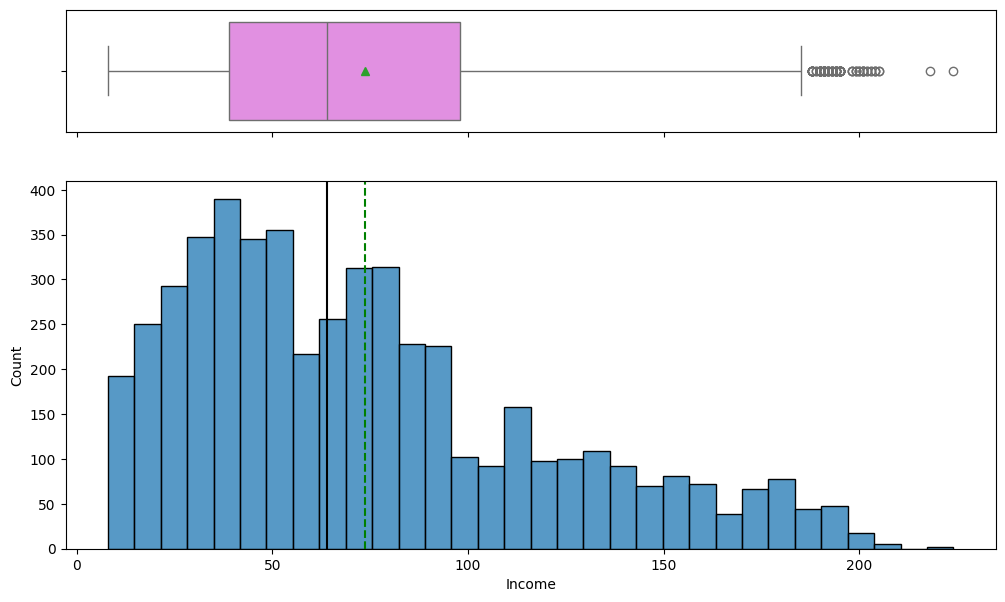

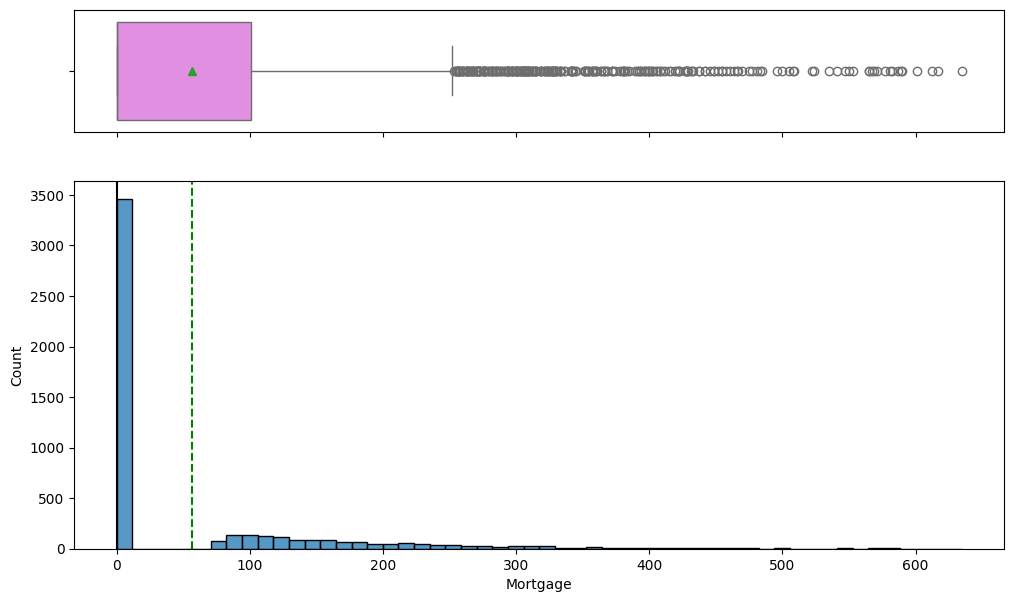

In [ ]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

In [ ]:
# CDF plot of numerical values
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

## Age Column Univariate Analysis

In [ ]:
df['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

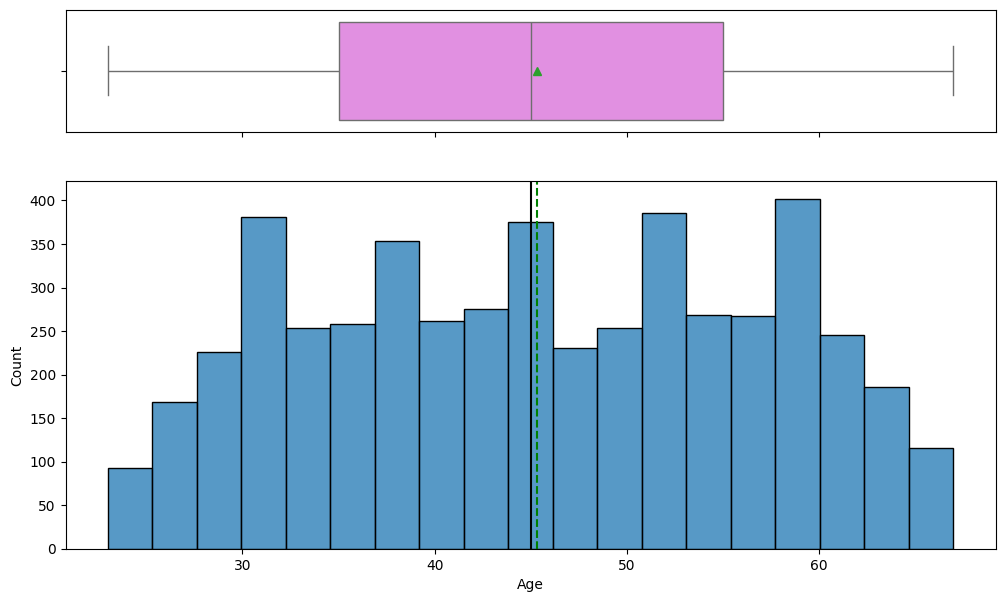

In [ ]:
histogram_boxplot(df, "Age")

Observation: The Age column seems to have a fairly symmetric distribution with a median and mean value of 45 years old.

##Experience Column Univariate Analysis

In [ ]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

In [ ]:
df[df["Experience"] < 0]["Experience"].unique()

array([], dtype=int64)

In [ ]:
df['Experience'].value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
17    125
34    125
27    125
29    124
22    124
7     121
8     119
6     119
15    119
10    118
13    117
33    117
11    116
37    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

In [ ]:
sns.histplot(df, x='Experience')

<Axes: xlabel='Experience', ylabel='Count'>

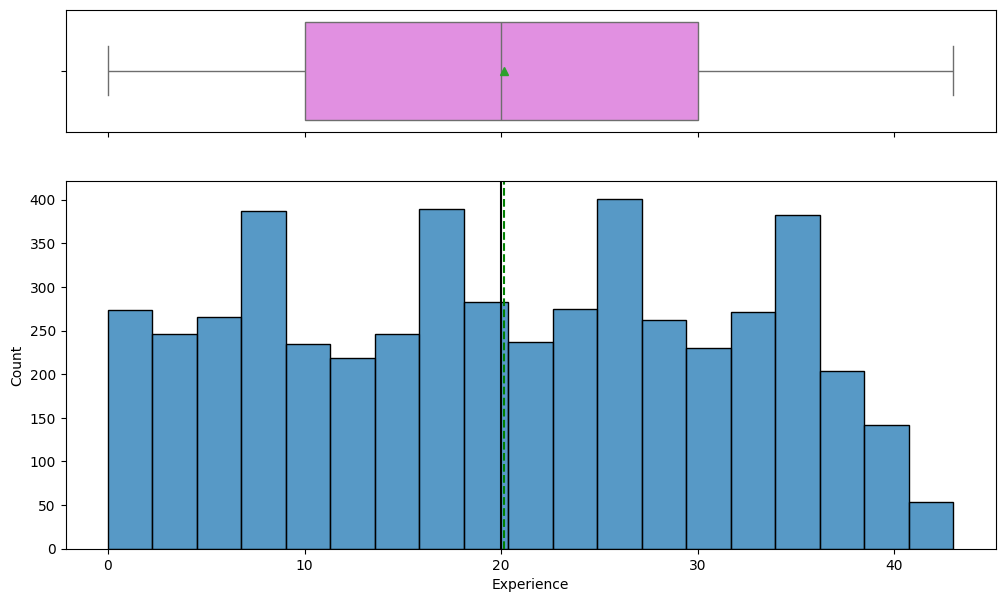

In [ ]:
histogram_boxplot(df, "Experience")

Observation: We have 52 rows that have negative years of experience. We will want to treat.

Experience also has a fairly symmetric distribution.

##Income Column Univariate Analysis

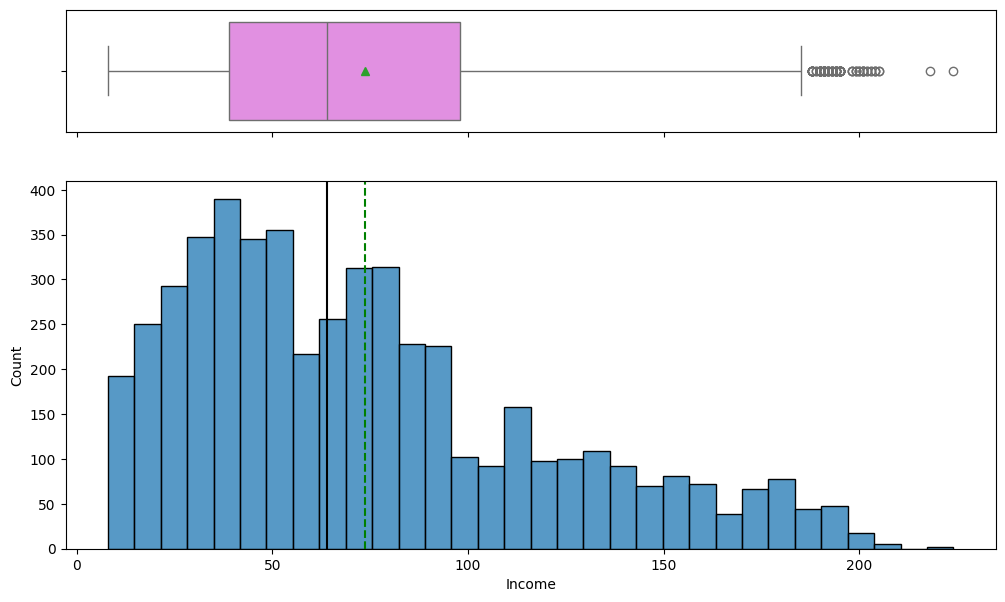

In [ ]:
histogram_boxplot(df, "Income")

In [ ]:
df['Income_Brackets'] = pd.cut(df['Income'],bins=[0,50,150,250,600],labels=['0-50k','51-150k','151-250k', '251k+'], right = False)

<Axes: xlabel='Income_Brackets', ylabel='Count'>

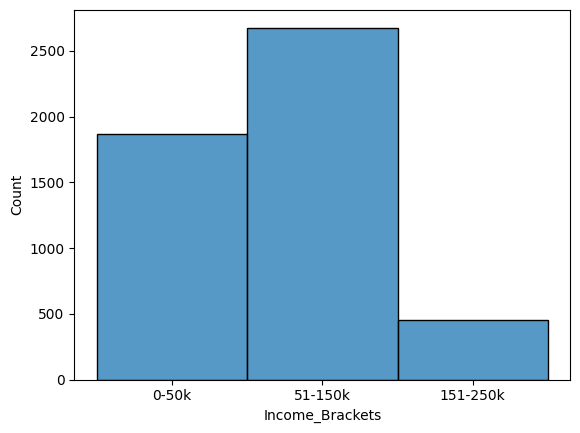

In [ ]:
sns.histplot(df, x='Income_Brackets')

Obervation: Income has a right-skewed distribution with outliers that should be kept in mind as I progress, but shouldn't be removed from the dataset as I believe all income values are important to this campaign.

##Zip Code Univariate Analysis

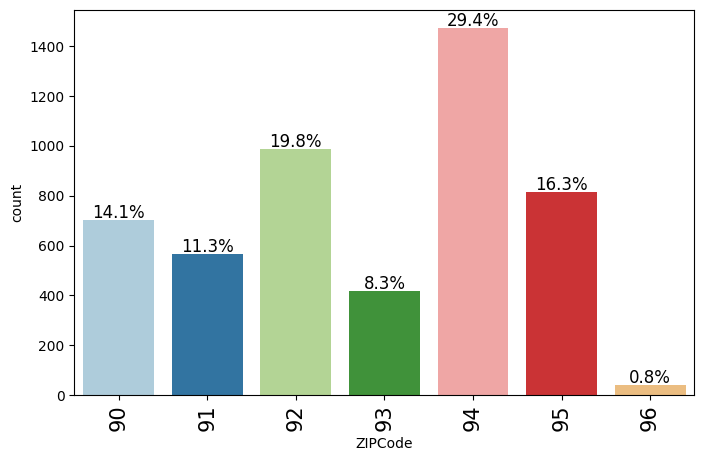

In [ ]:
labeled_barplot(df, "ZIPCode", perc=True)

Observation: Overall, this column accounts for less than 1% of the data in this set and doesn't contribute to the predictions we seek. However, if we had a lot more data, these numbers would hold a lot more value in our predictions

##Family Column Univariate Analysis

In [ ]:
df['Family'].value_counts(normalize=True)

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

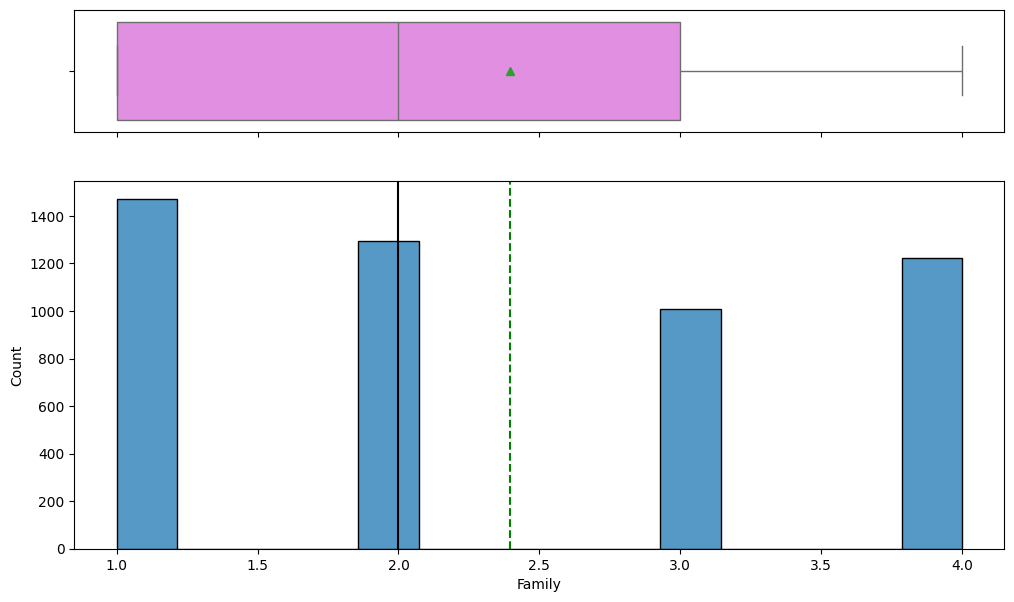

In [ ]:
histogram_boxplot(df, "Family")

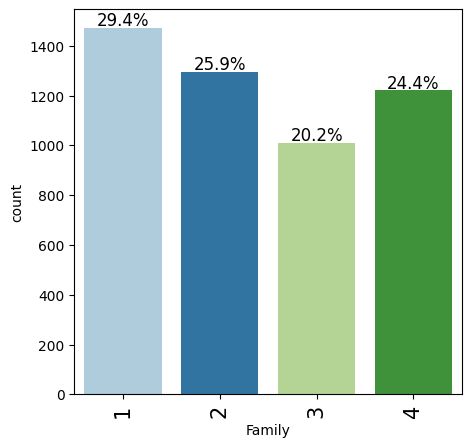

In [ ]:
labeled_barplot(df, "Family", perc=True)

Observation: One member families accounts for the highest value in this column, then 2, 4, and 3 being the smallest.

##Credit Card Univariate Analysis

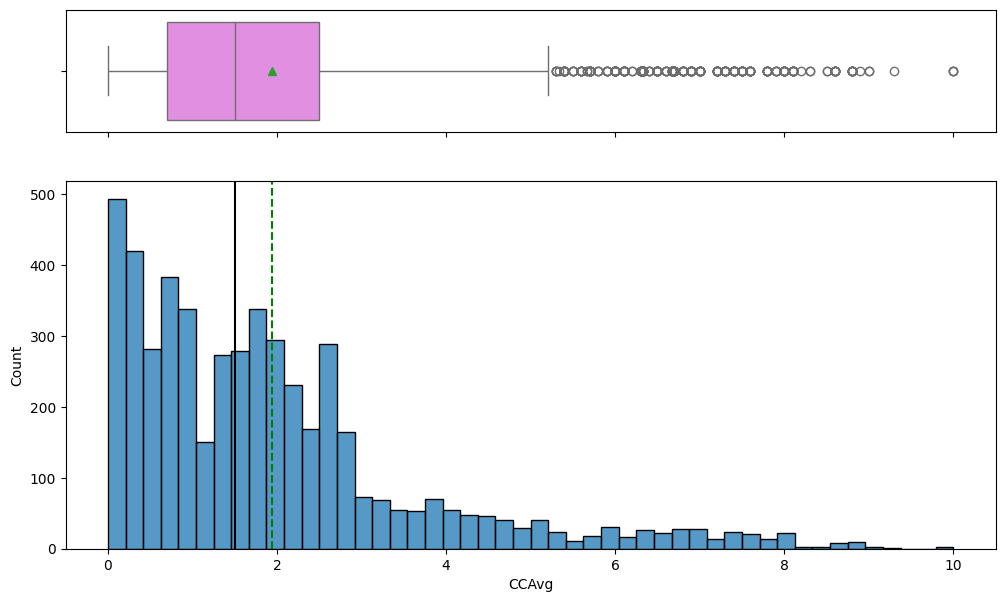

In [ ]:
histogram_boxplot(df, "CCAvg")

Observation: This category has a right-skewed distribution with a lot of outliers. This is not very surprising as one might consider that those with higher incomes could potentially have higher monthly credit card spending as well. Though, it will take some bivariate analysis to determine if there is a correlation between the two.

##Education Univariate Analysis

In [ ]:
# Education percentages for the dataset
df['Education'].value_counts(normalize=True)

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

In [ ]:
labeled_barplot(df, "Education", perc=True)

Observation: 58% of customers have graduate or higher level education.

##Mortgage Univariate Analysis

In [ ]:
# Mortgage value percentages
df['Mortgage'].value_counts(normalize=True)

0      0.6924
98     0.0034
119    0.0032
89     0.0032
91     0.0032
        ...  
547    0.0002
458    0.0002
505    0.0002
361    0.0002
541    0.0002
Name: Mortgage, Length: 347, dtype: float64

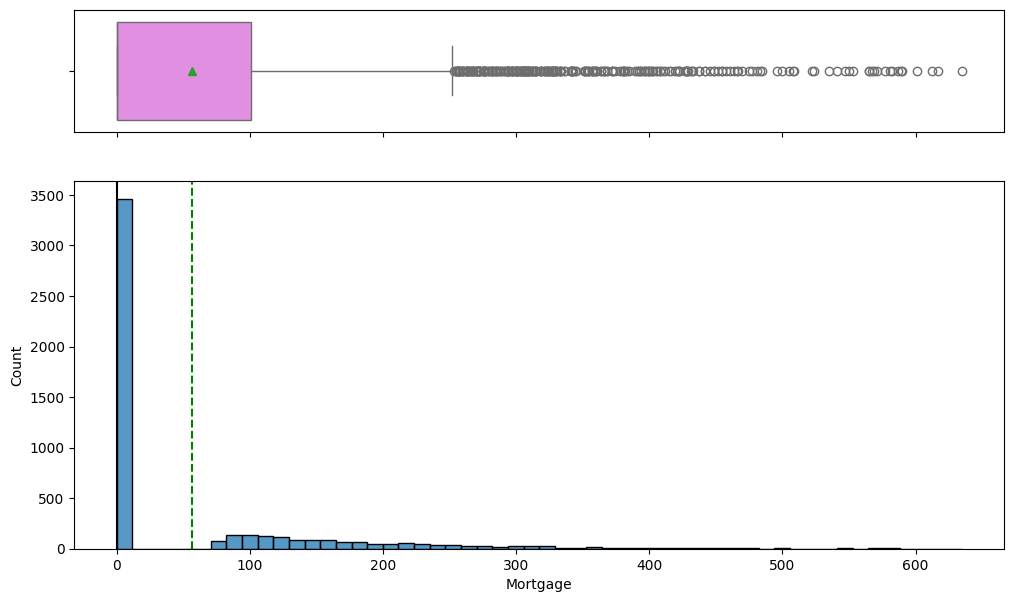

In [ ]:
histogram_boxplot(df, "Mortgage")

In [ ]:
# using pd.cut() function to create bins to better visualize the mortgage numbers
df['Mortgage_Values'] = pd.cut(df['Mortgage'],bins=[0,100,200,300,600],labels=['100k','200k','300k', '600k+'], right = False)

<Axes: xlabel='Mortgage_Values', ylabel='Count'>

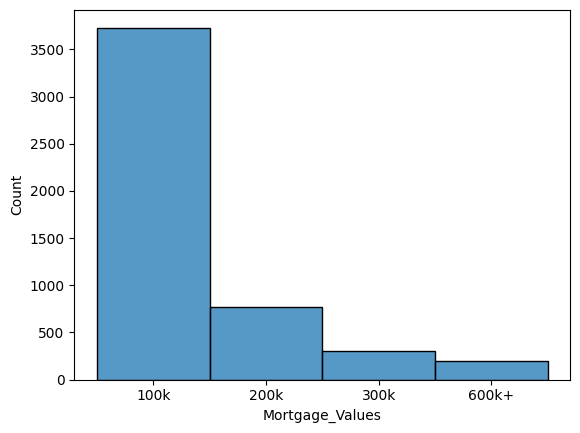

In [ ]:
sns.histplot(df, x='Mortgage_Values')

In [ ]:
# How many customers fall into each bin
for i in df['Mortgage_Values'].value_counts().index:
  print(i, df['Mortgage'][df['Mortgage_Values'] == i].sum())


100k 23522
200k 107995
300k 71967
600k+ 76545


In [ ]:
sns.boxplot(df,x='Mortgage_Values')
plt.show()

Observation:
* 69% of customers do not have any mortage value.
* The top 25% of customers have 100,000+ mortgage value.
* This column has a right-skewed distribution with a lot of outliers



##Personal Loan Univariate Analysis

In [ ]:
# What percentage of customers accepted the last campaign?
# 0 = No, 1 = Yes
df['Personal_Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

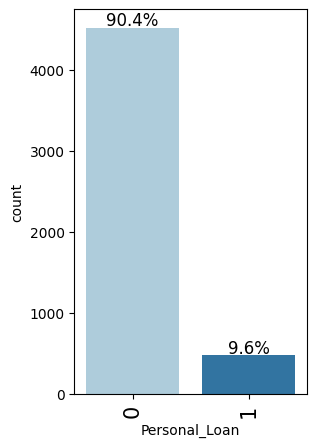

In [ ]:
labeled_barplot(df, "Personal_Loan", perc=True)

Observation: We know that almost 10% of customers accepted the personal loan offered in the last campaign.

##Security Account Univariate Analysis

In [ ]:
# What percentage of customers have security accounts with the bank?
# 0 = No, 1 = Yes
df['Securities_Account'].value_counts(normalize=True)

0    0.8956
1    0.1044
Name: Securities_Account, dtype: float64

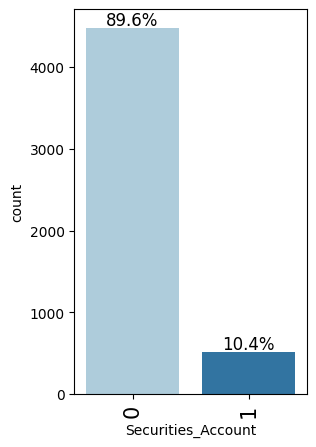

In [ ]:
labeled_barplot(df, "Securities_Account", perc=True)

Observation: 90% of customers do not have securities accounts with AllLife Bank

##CD Account Univariate Analysis

In [ ]:
# What percentage of customers have CD accounts with the bank?
# 0 = No, 1 = Yes
df['CD_Account'].value_counts(normalize=True)

0    0.9396
1    0.0604
Name: CD_Account, dtype: float64

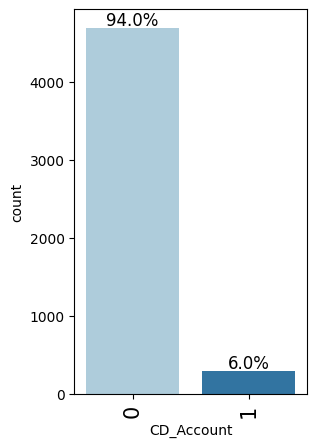

In [ ]:
labeled_barplot(df, "CD_Account", perc=True)

Observation: Only 6% of customers have a certificate of deposit with AllLife Bank

##Online Univariate Analysis

In [ ]:
# What percentage of customers use online banking?
# 0 = No, 1 = Yes
df['Online'].value_counts(normalize=True)


1    0.5968
0    0.4032
Name: Online, dtype: float64

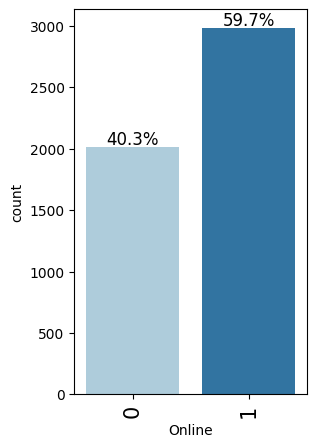

In [ ]:
labeled_barplot(df, "Online", perc=True)

Observation: 60% of customers utilize online banking

##Credit Card Univariate Analysis

In [ ]:
# What percentage of customers use a credit card issued by another bank?
# 0 = No, 1 = Yes
df['CreditCard'].value_counts(normalize=True)

0    0.706
1    0.294
Name: CreditCard, dtype: float64

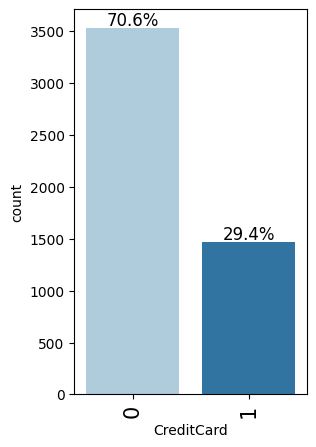

In [ ]:
labeled_barplot(df, "CreditCard", perc=True)

Observation: 30% of customers use competitors credit cards

# Bivariate Analysis Section

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

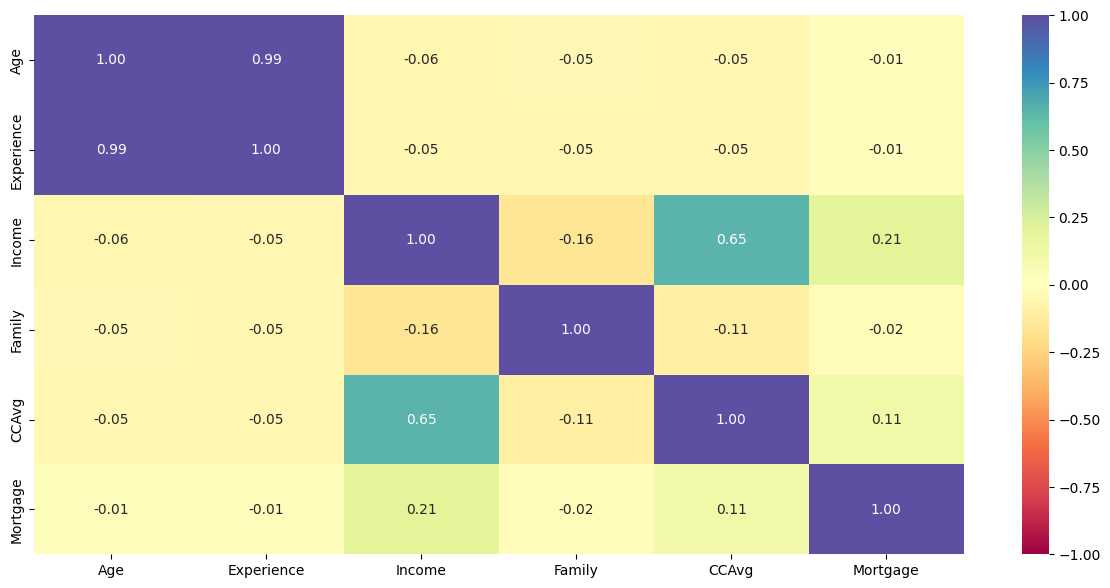

In [ ]:
# Find correlation between columns
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

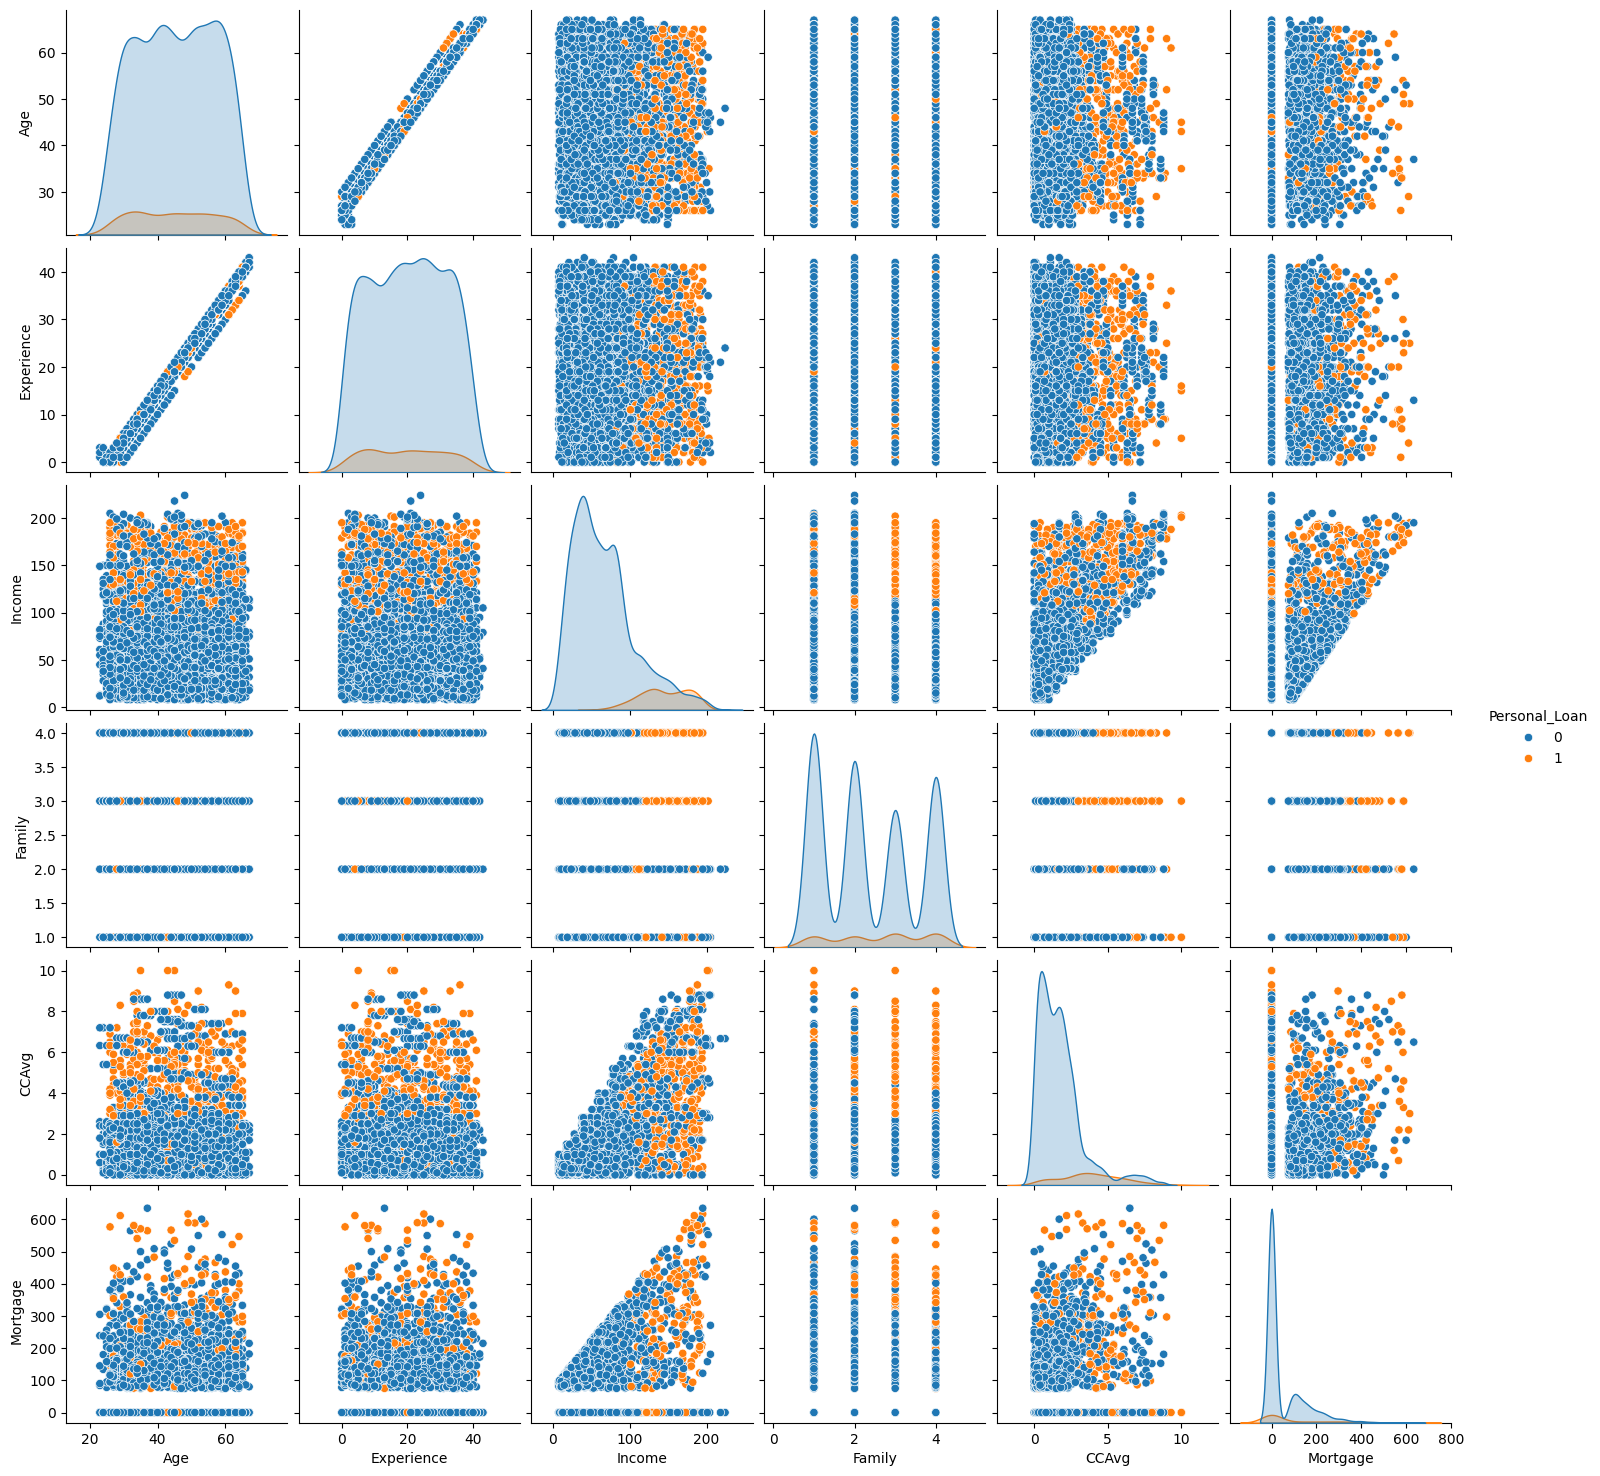

In [ ]:
# Plot relationship between variables
sns.pairplot(df, hue= "Personal_Loan")

Observation: Both the heatmap and pairplot seen to indicate several possible correlating columns to the Personal Loan columns we will want to dig into deeper.

# Personal Loan Bivariate Analysis

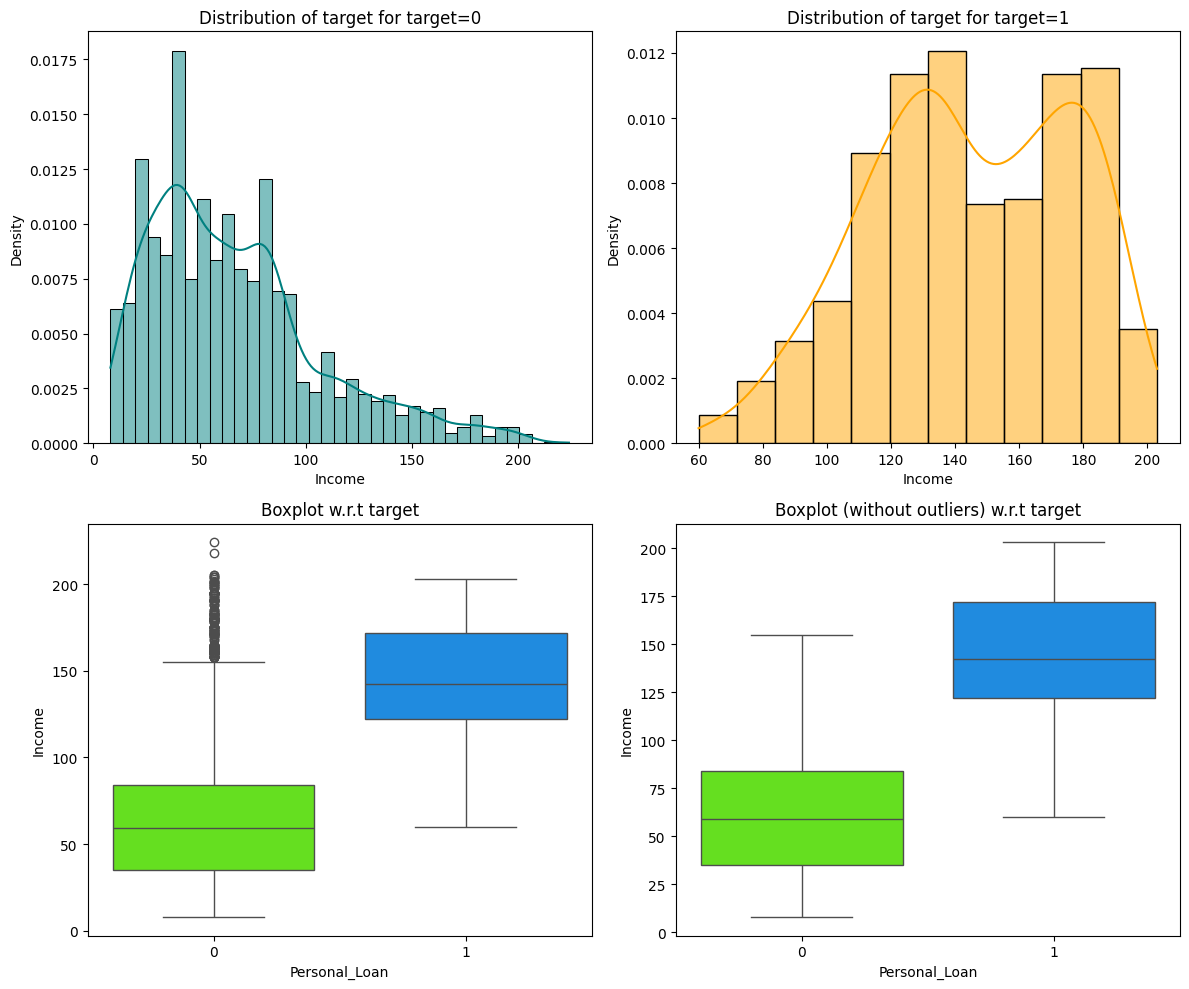

In [ ]:
distribution_plot_wrt_target(df, "Income", "Personal_Loan")

Personal_Loan       0    1   All
Income_Brackets                 
All              4520  480  5000
51-150k          2418  260  2678
151-250k          233  220   453
0-50k            1869    0  1869
------------------------------------------------------------------------------------------------------------------------


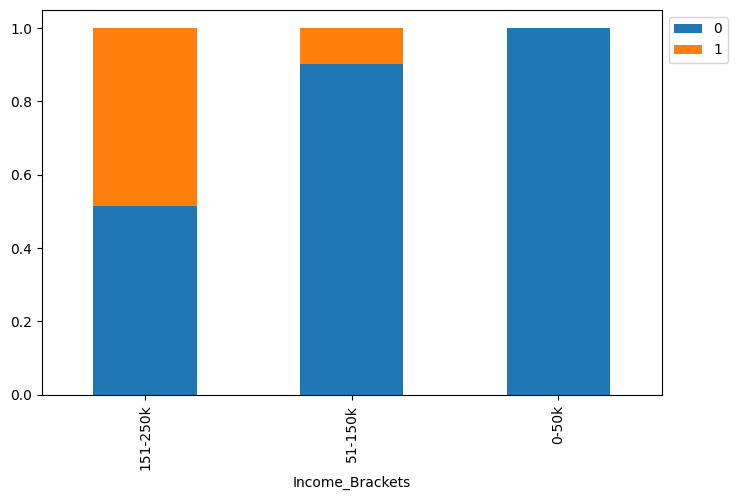

In [ ]:
stacked_barplot(df, "Income_Brackets", "Personal_Loan")

Observation: Those with incomes between 130K-180K are more likely to accept a personal loan

##Personal Loan and Mortgage Value comparison

In [ ]:
# How many people with mortgage values also accepted the personal loans
df.groupby('Mortgage_Values')['Personal_Loan'].value_counts()


Mortgage_Values  Personal_Loan
100k             0                3407
                 1                 325
200k             0                 727
                 1                  39
300k             0                 260
                 1                  40
600k+            0                 124
                 1                  74
Name: Personal_Loan, dtype: int64

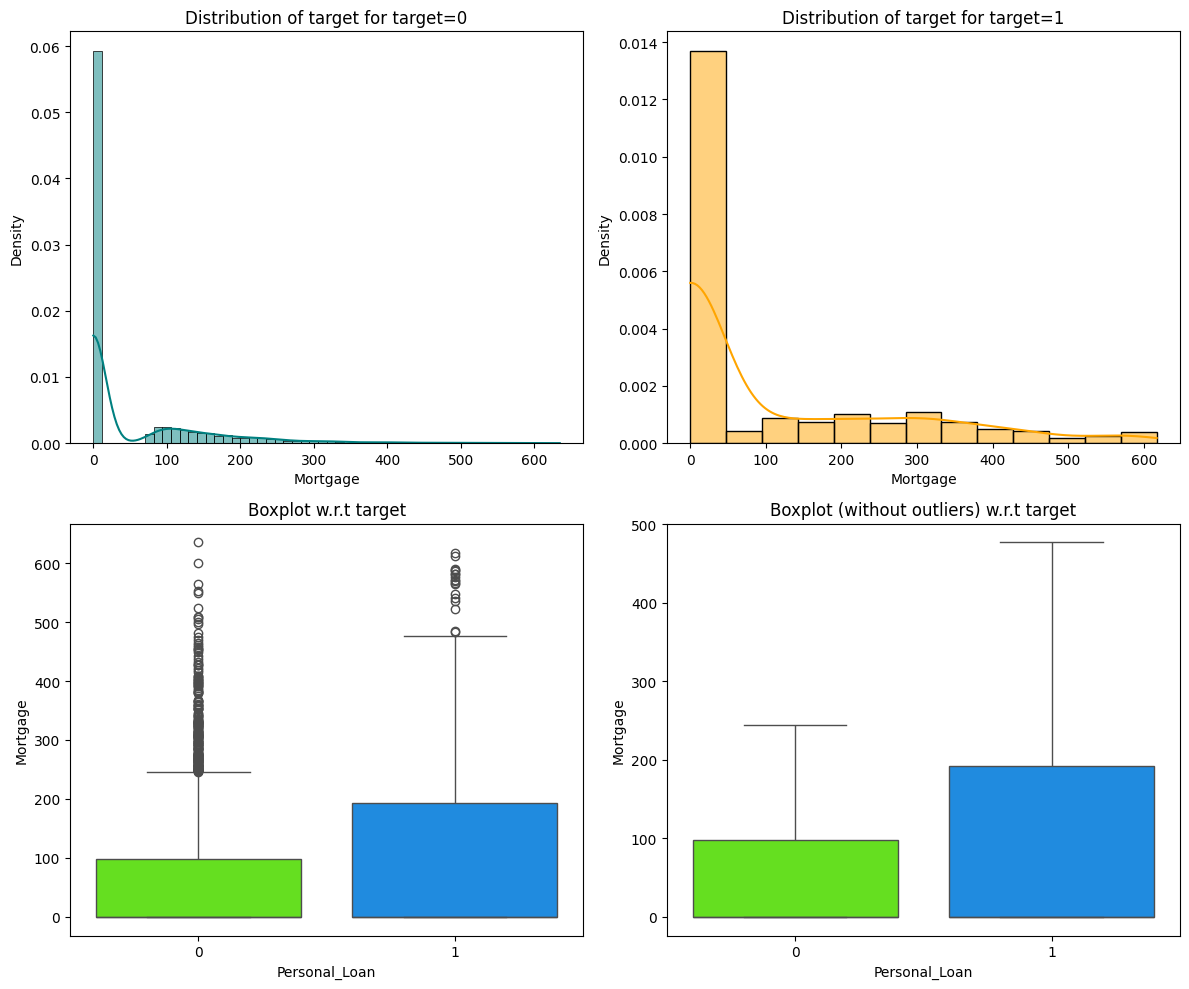

In [ ]:
distribution_plot_wrt_target(df, "Mortgage", "Personal_Loan")

Observations: The highest loan interest levels can be found in those with mortgage values between $0-200,000.

##Personal Loan and Experience Comparison

In [ ]:
# What is the personal loan to experience count ratio
df.groupby(["Experience", "Personal_Loan"]).size().reset_index()

Experience Personal_Loan    0
0            0             0   59
1            0             1    7
2            1             0   99
3            1             1    8
4            2             0   91
5            2             1    9
6            3             0  116
7            3             1   17
8            4             0  104
9            4             1    9
10           5             0  132
11           5             1   14
12           6             0  107
13           6             1   12
14           7             0  109
15           7             1   12
16           8             0  101
17           8             1   18
18           9             0  127
19           9             1   20
20          10             0  111
21          10             1    7
22          11             0  103
23          11             1   13
24          12             0   86
25          12             1   16
26          13             0  106
27          13             1   11
28          14             0  121
29          14             1    6
30          15             0  114
31          15             1    5
32          16             0  114
33          16             1   13
34          17             0  114
35          17             1   11
36          18             0  125
37          18             1   12
38          19             0  121
39          19             1   14
40          20             0  131
41          20             1   17
42          21             0  102
43          21             1   11
44          22             0  111
45          22             1   13
46          23             0  131
47          23             1   13
48          24             0  123
49          24             1    8
50          25             0  128
51          25             1   14
52          26             0  120
53          26             1   14
54          27             0  115
55          27             1   10
56          28             0  127
57          28             1   11
58          29             0  112
59          29             1   12
60          30             0  113
61          30             1   13
62          31             0   92
63          31             1   12
64          32             0  140
65          32             1   14
66          33             0  110
67          33             1    7
68          34             0  115
69          34             1   10
70          35             0  130
71          35             1   13
72          36             0  102
73          36             1   12
74          37             0  103
75          37             1   13
76          38             0   80
77          38             1    8
78          39             0   75
79          39             1   10
80          40             0   53
81          40             1    4
82          41             0   36
83          41             1    7
84          42             0    8
85          42             1    0
86          43             0    3
87          43             1    0

##Personal Loan and Education comparison

Education         1     2     3   All
Personal_Loan                        
All            2096  1403  1501  5000
0              2003  1221  1296  4520
1                93   182   205   480
------------------------------------------------------------------------------------------------------------------------


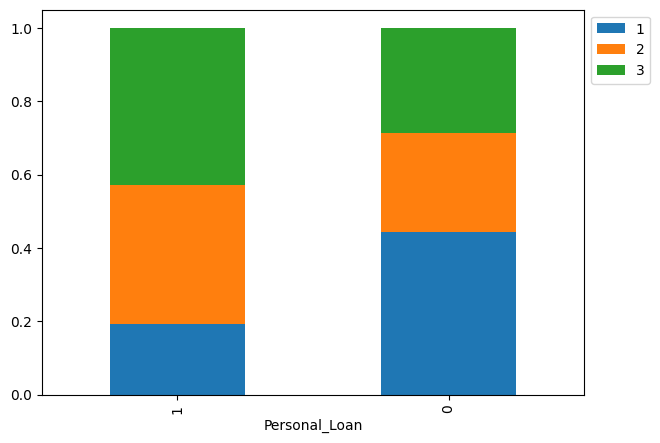

In [ ]:
stacked_barplot(df, "Personal_Loan", "Education")

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


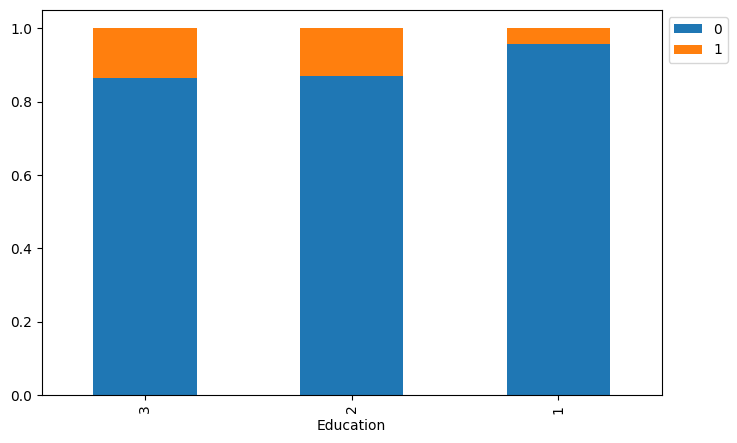

In [ ]:
stacked_barplot(df, "Education", "Personal_Loan")

In [ ]:
# How many people in each education category got personal loans
# No = 0, Yes = 1
df.groupby(['Education', 'Personal_Loan']).size().reset_index()


Education Personal_Loan     0
0         1             0  2003
1         1             1    93
2         2             0  1221
3         2             1   182
4         3             0  1296
5         3             1   205

In [ ]:
#what percent of each education column corresponds with a 1 in the personal loan column
df.groupby('Education')['Personal_Loan'].value_counts(normalize=True) * 100


Education  Personal_Loan
1          0                95.562977
           1                 4.437023
2          0                87.027798
           1                12.972202
3          0                86.342438
           1                13.657562
Name: Personal_Loan, dtype: float64

Observations: Those in education levels 2 & 3 are most likely to accept a personal loan

##Personal Loan and Family comparison

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


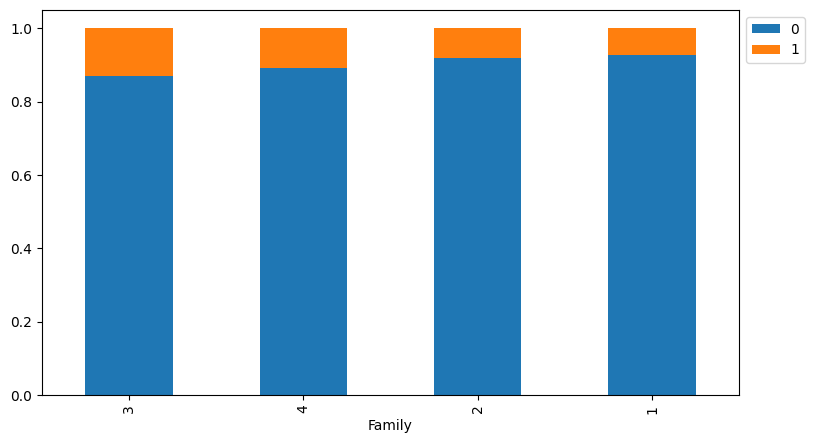

In [ ]:
stacked_barplot(df, "Family", "Personal_Loan")

In [ ]:
# What is the personal loan to family count ratio
df.groupby(["Family", "Personal_Loan"]).size().reset_index()


Family Personal_Loan     0
0       1             0  1365
1       1             1   107
2       2             0  1190
3       2             1   106
4       3             0   877
5       3             1   133
6       4             0  1088
7       4             1   134

<Axes: xlabel='Family', ylabel='Count'>

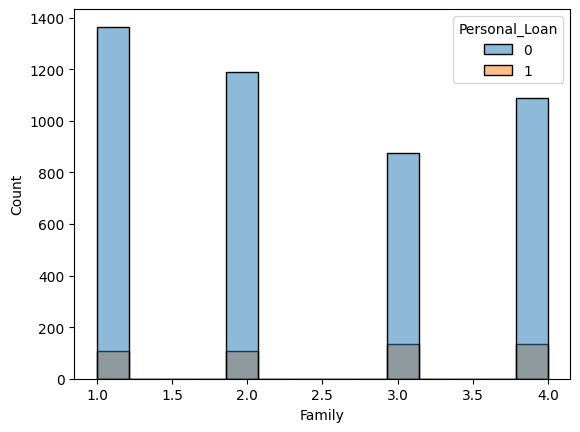

In [ ]:
sns.histplot(df, x= "Family", hue="Personal_Loan" )

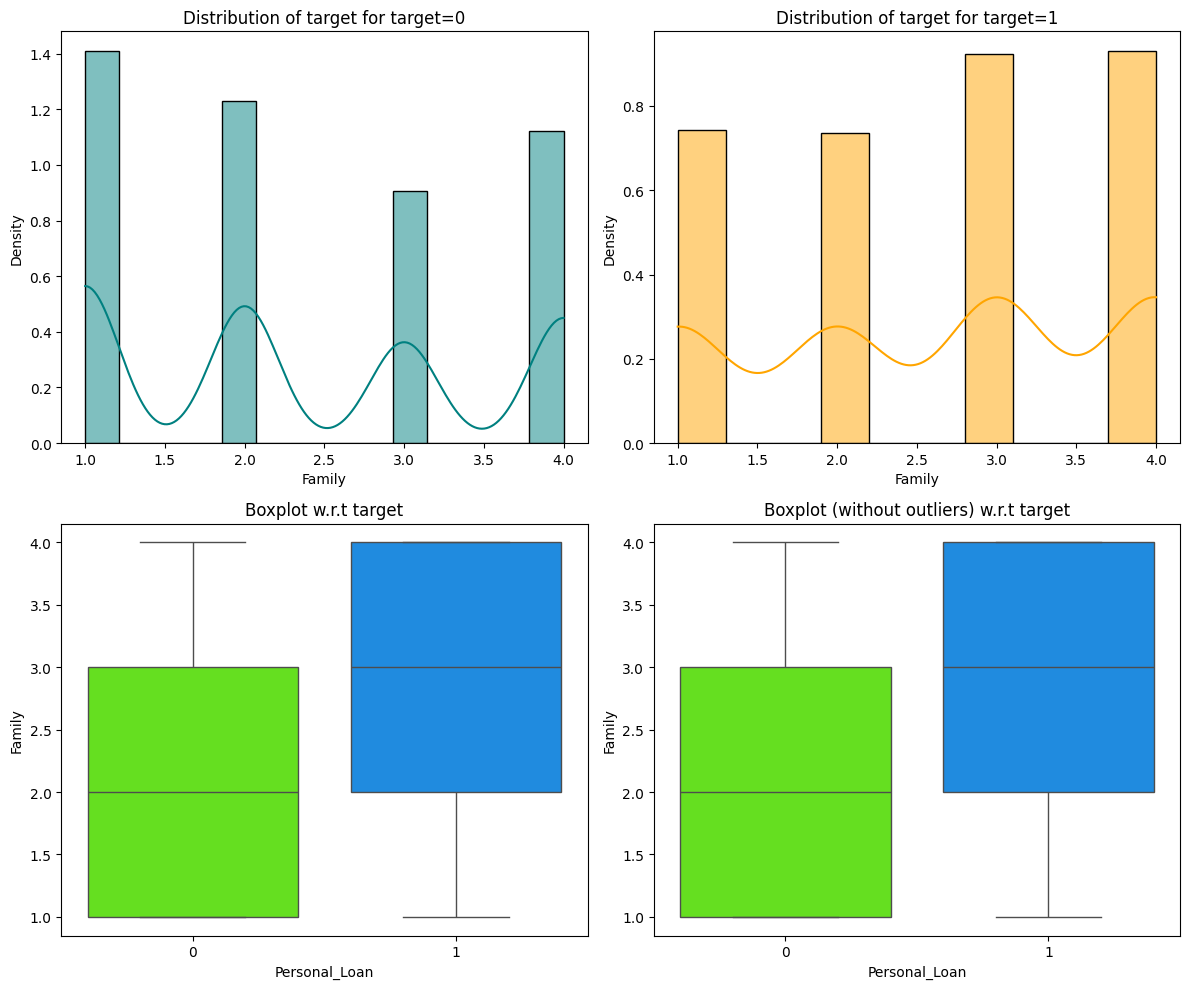

In [ ]:
distribution_plot_wrt_target(df, "Family", "Personal_Loan")

In [ ]:
sns.boxplot(df, x= 'Family', y="Personal_Loan")

<Axes: xlabel='Family', ylabel='Personal_Loan'>

Observation: Those with family sizes greater than 2 are more likely to accept a personal loan

##Personal Loan and Securities comparison

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


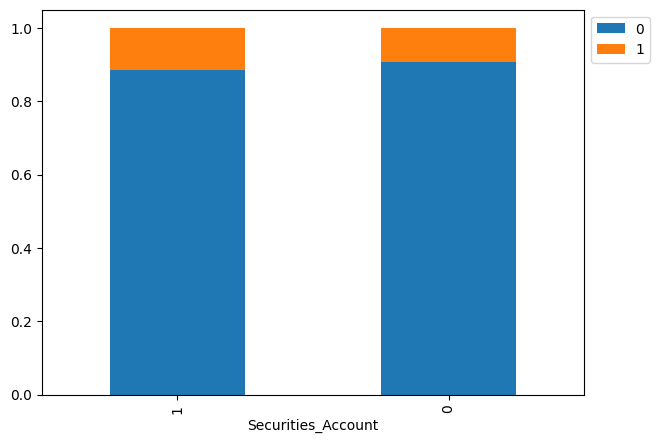

In [ ]:
stacked_barplot(df, "Securities_Account", "Personal_Loan")

In [ ]:
# What is the personal loan to Securities count ratio
df.groupby(["Securities_Account", "Personal_Loan"]).size().reset_index()

Securities_Account Personal_Loan     0
0                  0             0  4058
1                  0             1   420
2                  1             0   462
3                  1             1    60

Observation: Those who do have a securities account are slightly more likely to get a personal loan than those who don't have a securities account.

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


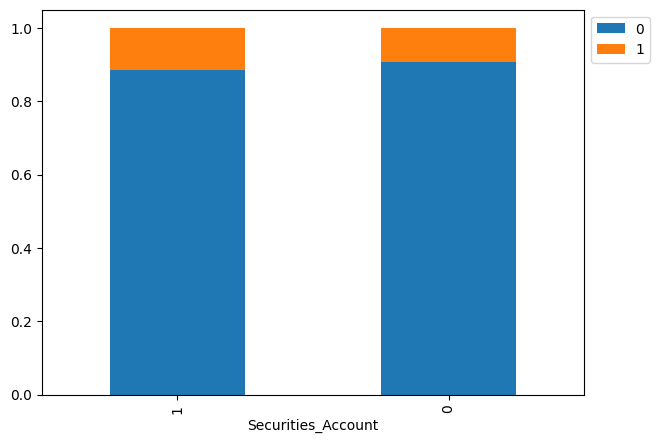

In [ ]:
stacked_barplot(df, "Securities_Account", "Personal_Loan")

##Personal Loan and CD comparison

In [ ]:
# What is the personal loan to CD count ratio
df.groupby(["CD_Account", "Personal_Loan"]).size().reset_index()

CD_Account Personal_Loan     0
0          0             0  4358
1          0             1   340
2          1             0   162
3          1             1   140

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


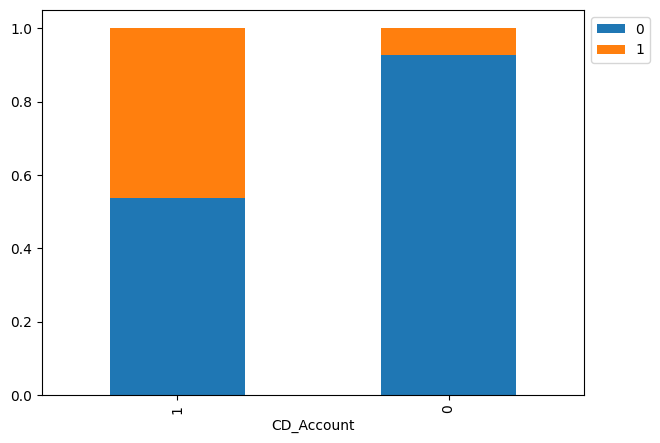

In [ ]:
stacked_barplot(df, "CD_Account", "Personal_Loan")

Observation: Those who have a CD with AllLife Bank are more likely to also take a personal loan with them.

## Personal Loan and Online use comparison

In [ ]:
# What is the personal loan to Online count ratio
df.groupby(["Online", "Personal_Loan"]).size().reset_index()

Online Personal_Loan     0
0      0             0  1827
1      0             1   189
2      1             0  2693
3      1             1   291

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


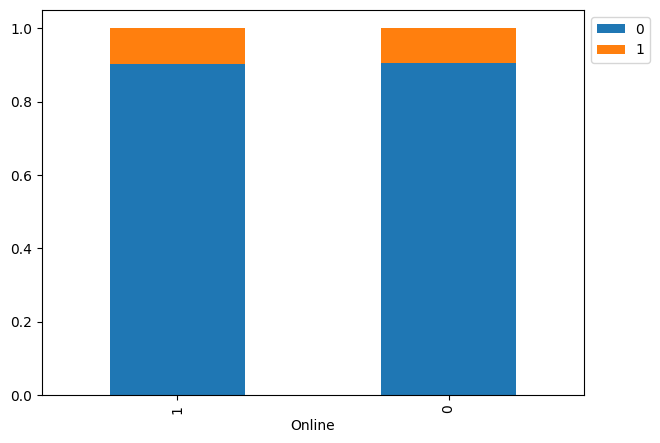

In [ ]:
stacked_barplot(df, "Online", "Personal_Loan")

Observation: Online activity doesn't contribute to the predictability of accepting a personal loan

## Person Loan and Credit Cards with other banks comparison

In [ ]:
# how many people have CreditCards with another bank and accepted the Personal_Loans

df.groupby(['CreditCard', 'Personal_Loan']).size().reset_index()


CreditCard Personal_Loan     0
0          0             0  3193
1          0             1   337
2          1             0  1327
3          1             1   143

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


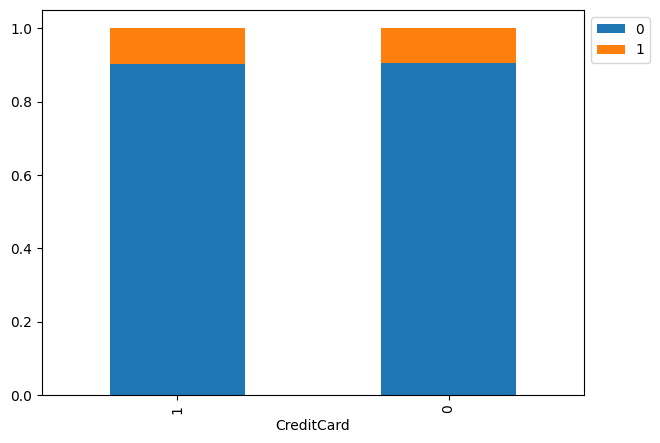

In [ ]:
stacked_barplot(df, "CreditCard", "Personal_Loan")

Observation: Those who use a credit card from another bank are marginally more likely to accept a personal loan.

## Personal Loan and ZIP Code comparison

In [ ]:
# Which ZIPCode values have the most Personal loans with a 1 value

df[df['Personal_Loan'] == 1]['ZIPCode'].value_counts(normalize=True).head()


94    0.287500
92    0.195833
95    0.166667
90    0.139583
91    0.114583
Name: ZIPCode, dtype: float64

Observation: The 3 most successful zipcodes were
1. 94
2. 92
3. 95


##Personal Loan and Age comparison

In [ ]:
# find the top 5 ages with Personal_Loan values equal to 1
df.groupby(['Age', 'Personal_Loan']).size().reset_index().sort_values(by="Personal_Loan", ascending=False).head(5)


Age Personal_Loan   0
45   45             1  13
31   38             1  12
35   40             1   8
37   41             1   8
39   42             1  14

In [ ]:
df[df['Personal_Loan'] == 1]['Age'].value_counts(normalize=True).head(10)

34    0.037500
30    0.035417
35    0.033333
63    0.033333
36    0.033333
52    0.031250
54    0.031250
33    0.031250
29    0.031250
43    0.031250
Name: Age, dtype: float64

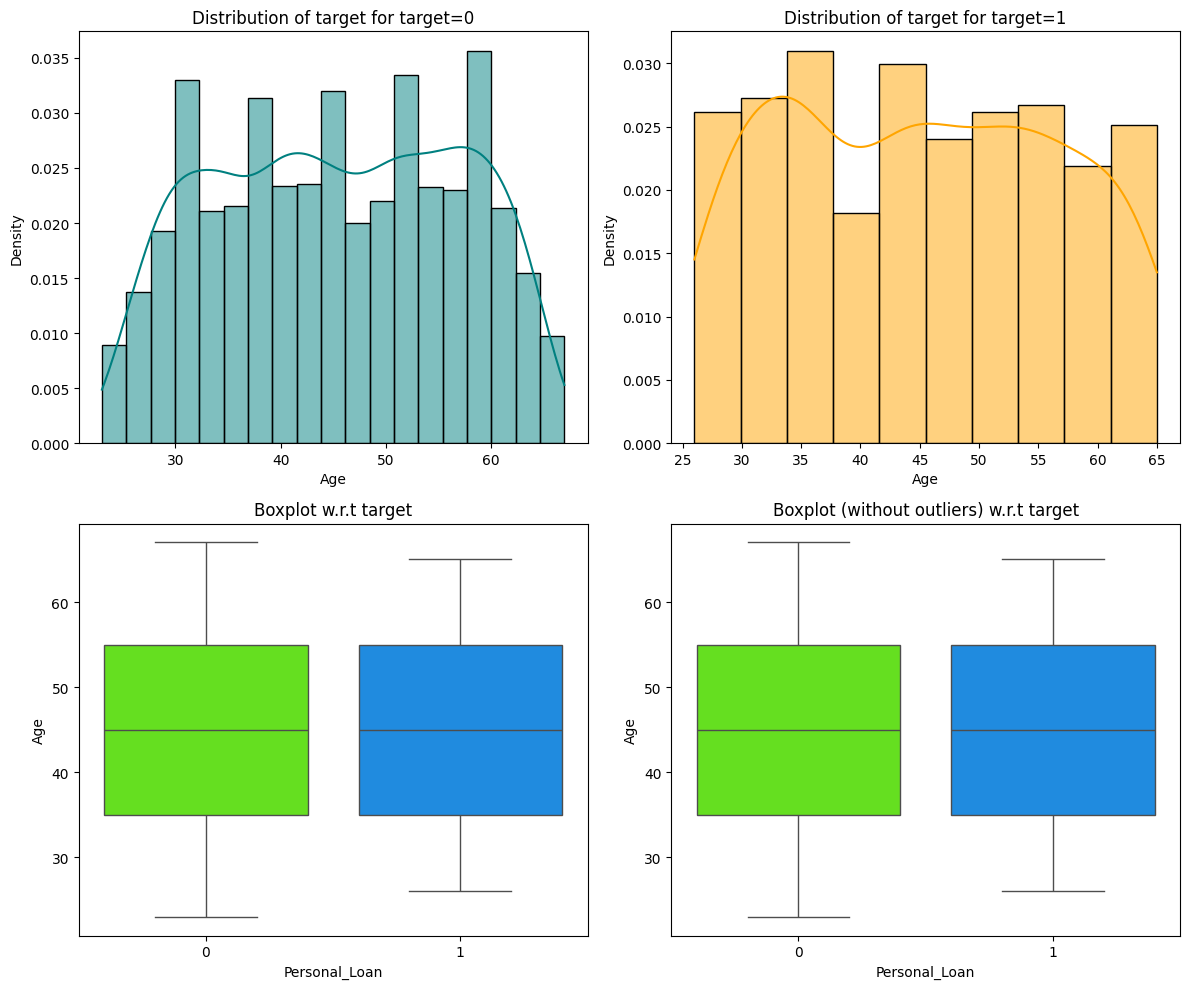

In [ ]:
distribution_plot_wrt_target(df, "Age", "Personal_Loan")

Observation: This is a fairly uniform distribution. However, the target age for likelihood of accepting a personal loan is between 35-55 yrs old.

In [ ]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [ ]:
((df.select_dtypes(include=["float64", "int64"]) < lower)
    |(df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

In [ ]:
print("Q1:", Q1, "Q3:", Q3, "IQR:", IQR, "Lower:", lower, "Upper:", upper )

Q1: Age           35.0
Experience    10.0
Income        39.0
Family         1.0
CCAvg          0.7
Mortgage       0.0
Name: 0.25, dtype: float64 Q3: Age            55.0
Experience     30.0
Income         98.0
Family          3.0
CCAvg           2.5
Mortgage      101.0
Name: 0.75, dtype: float64 IQR: Age            20.0
Experience     20.0
Income         59.0
Family          2.0
CCAvg           1.8
Mortgage      101.0
dtype: float64 Lower: Age             5.0
Experience    -20.0
Income        -49.5
Family         -2.0
CCAvg          -2.0
Mortgage     -151.5
dtype: float64 Upper: Age            85.0
Experience     60.0
Income        186.5
Family          6.0
CCAvg           5.2
Mortgage      252.5
dtype: float64


**What are my outliers**

In [ ]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [ ]:
((df.select_dtypes(include=["float64", "int64"]) < lower)
    |(df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

# Data Prep for Model Building

**Note: I am dropping the ZIPCode column because I went through the whole training and pruning of the tree and found that it didn't contribute enough value to keep, but increased processing time and made visualization less effective.**
* Removing this column initially changed the training data scores, but had no effect on the test data scores.

In [ ]:
# Separate independent and dependent variable
X = df.drop(["Personal_Loan", "Experience", "Mortgage_Values", "ZIPCode", "Income_Brackets"], axis=1)
y = df["Personal_Loan"]

In [ ]:
X

Age  Income  Family  CCAvg Education  Mortgage Securities_Account  \
0      25      49       4    1.6         1         0                  1   
1      45      34       3    1.5         1         0                  1   
2      39      11       1    1.0         1         0                  0   
3      35     100       1    2.7         2         0                  0   
4      35      45       4    1.0         2         0                  0   
...   ...     ...     ...    ...       ...       ...                ...   
4995   29      40       1    1.9         3         0                  0   
4996   30      15       4    0.4         1        85                  0   
4997   63      24       2    0.3         3         0                  0   
4998   65      49       3    0.5         2         0                  0   
4999   28      83       3    0.8         1         0                  0   

     CD_Account Online CreditCard  
0             0      0          0  
1             0      0          0  
2             0      0          0  
3             0      0          0  
4             0      0          1  
...         ...    ...        ...  
4995          0      1          0  
4996          0      1          0  
4997          0      0          0  
4998          0      1          0  
4999          0      1          1  

[5000 rows x 10 columns]

In [ ]:
# Made dummy variables for Zipcode and education
X = pd.get_dummies(X, columns=["Education"], drop_first=True)
# Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [ ]:
# What is the shape of the X test/train
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("-" * 50)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("-" * 50)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 11)
Shape of test set :  (1500, 11)
--------------------------------------------------
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
--------------------------------------------------
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


### Model Evaluation Criterion

**What does the bank want?**
* The bank wants to devise campaigns with better target marketing to increase the success ratio from the last campaign.

**How to minimize wrong predictions:**
* The most important predictions will be the True Positives (customers predictied to take the personal loan that do), which means we need to minimize the the False Negatives (customers predicted not to but would have)

**Conclusion**
* We need to maximize recall in order to minimize False Negatives






## Model Performance with Confusion Matrix

### Model Building Functions

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Build a Decision Tree Model

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# How accurate is the initial tree with no pre or post pruning
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9866666666666667


In [ ]:
#Checking number of positives
y.value_counts(1)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(dTree, X_train, y_train)
decision_tree_perf_train_without

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Initial Decision Tree Confusion Matrix

In [ ]:
confusion_matrix_sklearn(dTree,X_train, y_train)

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(dTree, X_test, y_test)
decision_tree_perf_test_without

Accuracy    Recall  Precision        F1
0  0.986667  0.912752   0.951049  0.931507

##Decision Tree Feature Importance Visualization Section

In [ ]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_2', 'Education_3']


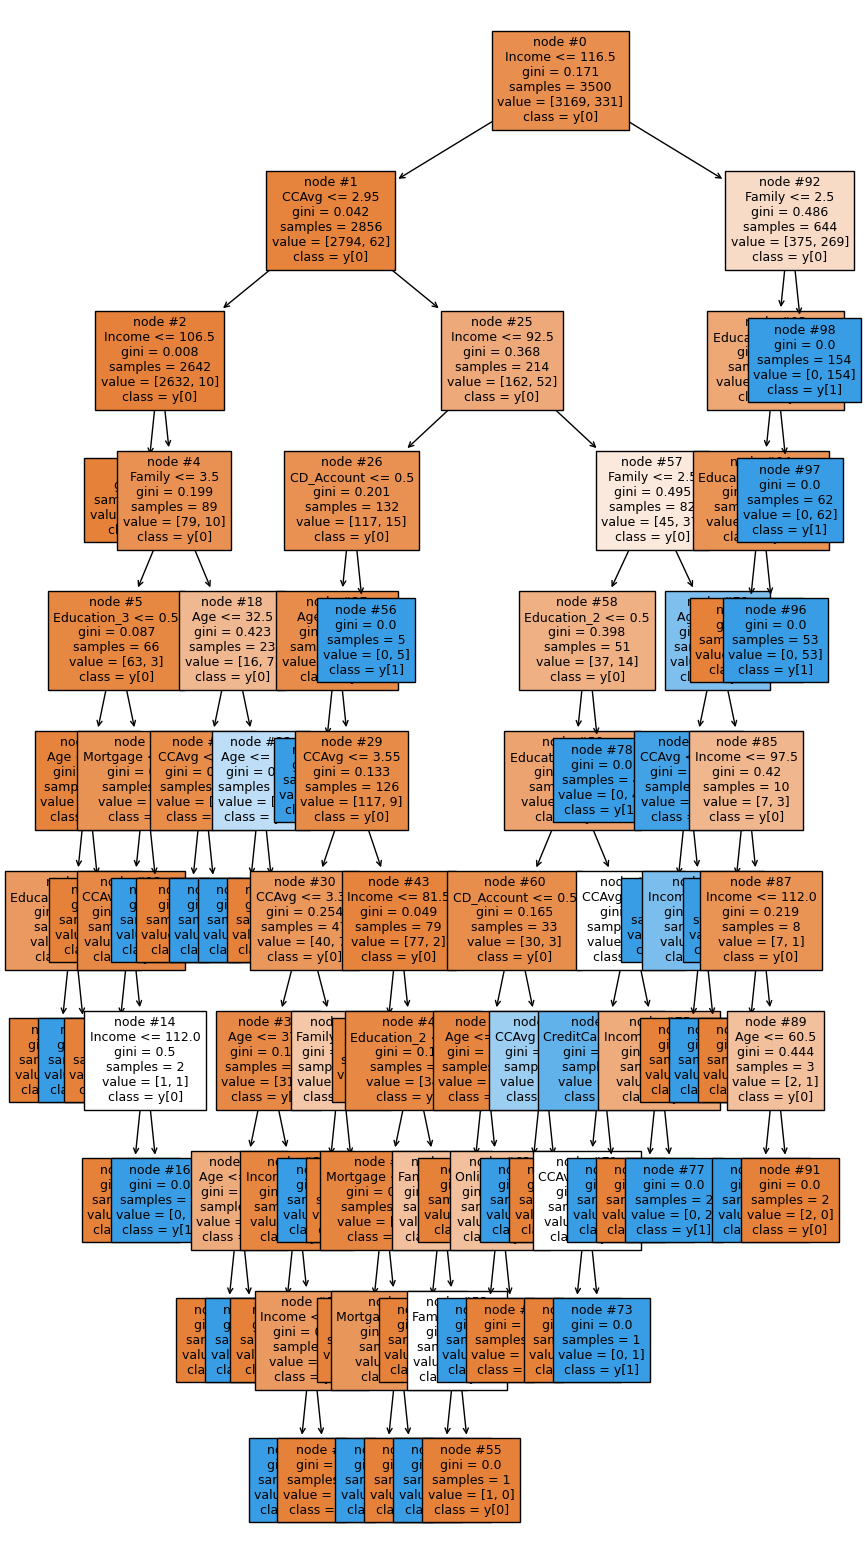

In [ ]:
plt.figure(figsize=(10, 20))
tree.plot_tree(dTree, feature_names = feature_names, filled = True, fontsize = 9, node_ids = True, class_names = True)
plt.show()

In [ ]:
# Text report of the rules of a decision tree
print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- weights: [43.00, 0.00] class: 0
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- Mortgage <= 231.00
|   |   |   |   |   |   |--- CCAvg <= 1.95
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  1.95
|   |   |   |   |   |   |   |--- Income <= 112.00
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  112.00
|   

In [ ]:
# Ranked importance of features in the tree normalized
print(pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = "Imp", ascending = False))

                         Imp
Income              0.315198
Family              0.259811
Education_2         0.166192
Education_3         0.144605
CCAvg               0.055184
Age                 0.032404
CD_Account          0.017273
Mortgage            0.005996
Online              0.002224
CreditCard          0.001112
Securities_Account  0.000000


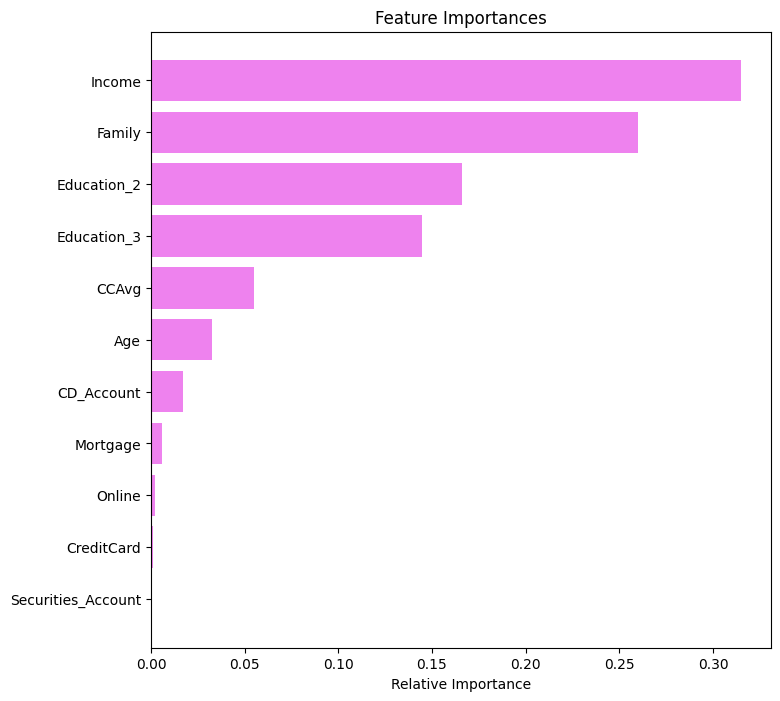

In [ ]:
# Ranked importance visualized
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observation: In this unprunned tree the most important features are:
* Income
* Family Size
* Education 2
* Education 3

### Model Performance Improvement

# Pre Pruning Section

In [ ]:
dTree1 = DecisionTreeClassifier(criterion ='gini', max_depth= 3, random_state= 1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

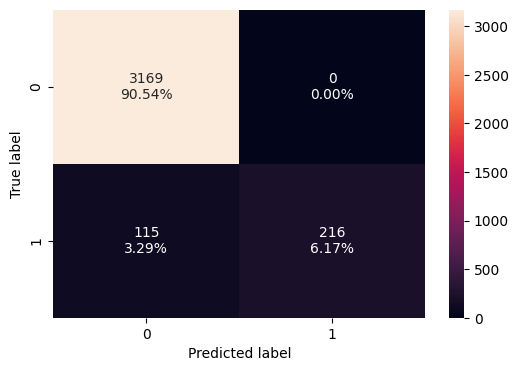

In [ ]:
# Confusion Matrix of pre-pruned dTree1
confusion_matrix_sklearn(dTree1, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(dTree1, X_train, y_train)
decision_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.967143  0.652568        1.0  0.789762

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(dTree1, X_test, y_test)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.960667  0.604027        1.0  0.753138

Observation:
* Recall on the training set has reduced from 1 to 0.65
* Recall on the test set has reduced from 0.91 to 0.60
* This result is expected as the original tree overfit the data.

## Visualizing the Decision Tree

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_2', 'Education_3']


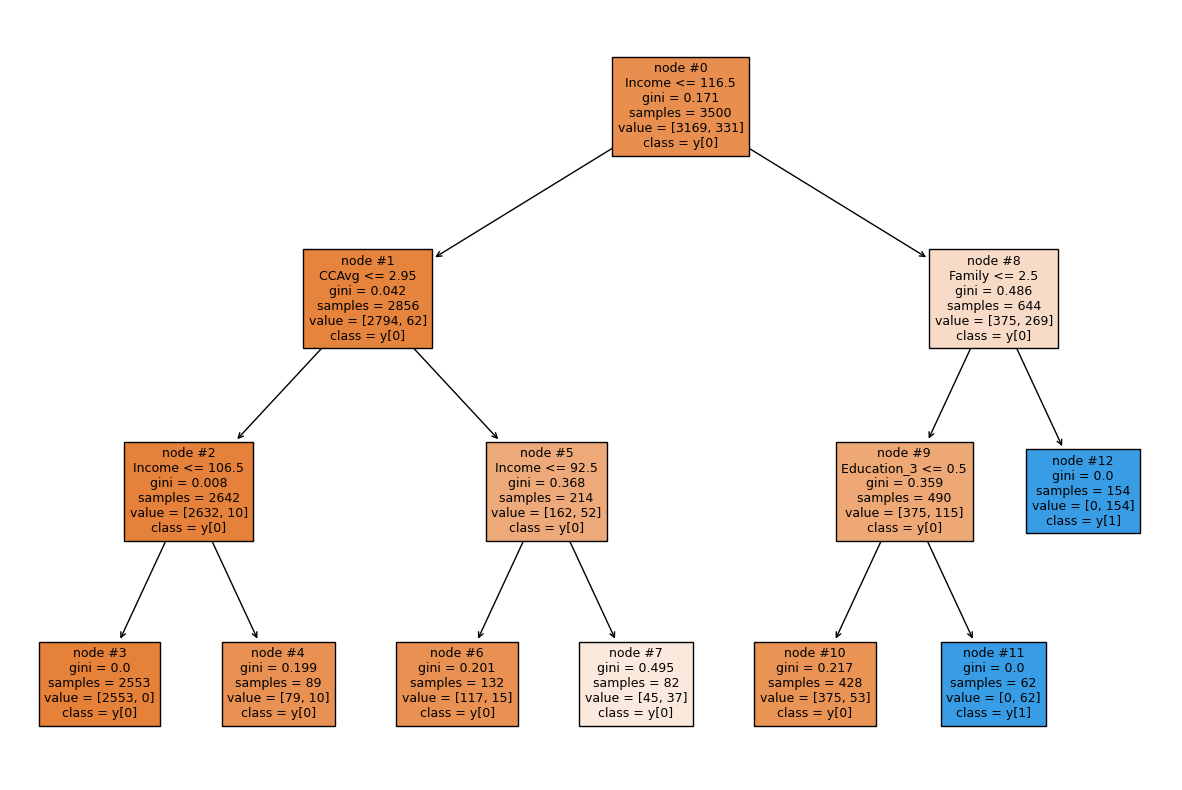

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(dTree1, feature_names= feature_names, filled= True, fontsize= 9, node_ids= True, class_names= True)
plt.show()

**Feature Importance**

In [ ]:
# Statistical tree report showint the rules of this decision tree
print(tree.export_text(dTree1, feature_names= feature_names, show_weights= True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- weights: [45.00, 37.00] class: 0
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- weights: [375.00, 53.00] class: 0
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [0.00, 62.00] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [0.00, 154.00] class: 1



In [ ]:
# Ranked Feature importance
print (pd.DataFrame(dTree1.feature_importances_, columns= ["Imp"], index= X_train.columns).sort_values(by= 'Imp', ascending = False))

                         Imp
Income              0.423442
Family              0.325586
Education_3         0.197232
CCAvg               0.053740
Age                 0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
Education_2         0.000000


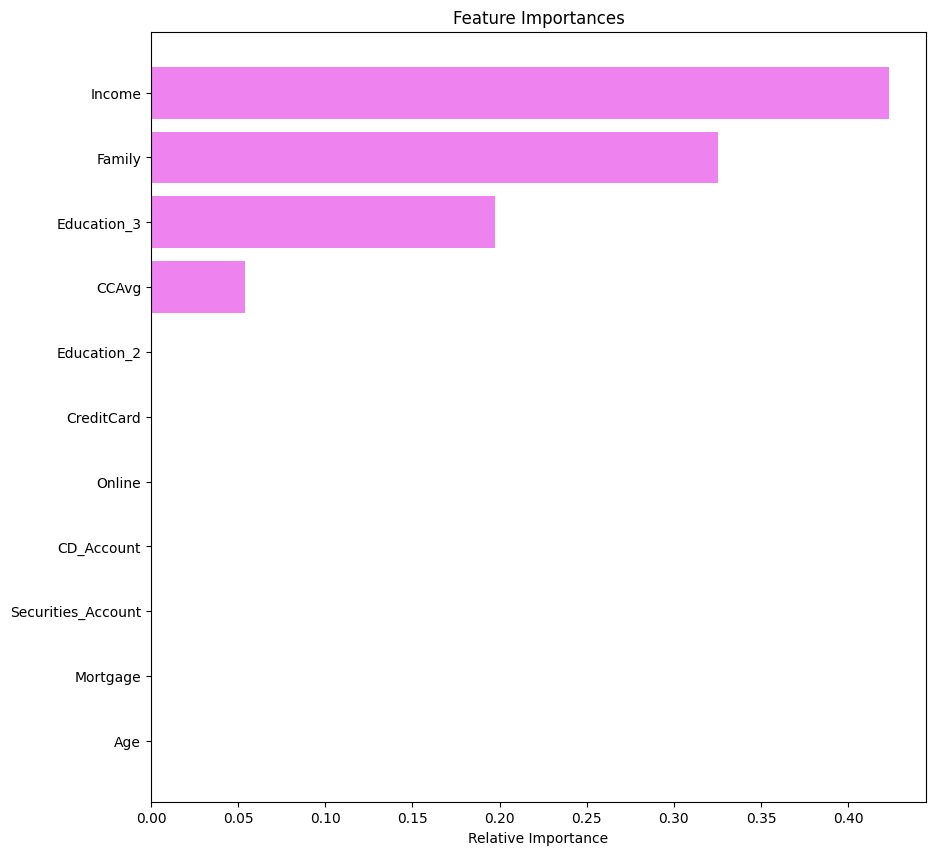

In [ ]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize= (10,10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color= "violet", align= "center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation: Our first pre-pruning attempt with a max-depth of 3 gives us the following Feature Importances
* Income
* Family
* Education 3
* CCAvg
* This is a slight change from the initial tree.

# Pre-pruning with GridSearch

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=1)

**GridSearch tuned model Confusion Matrix**

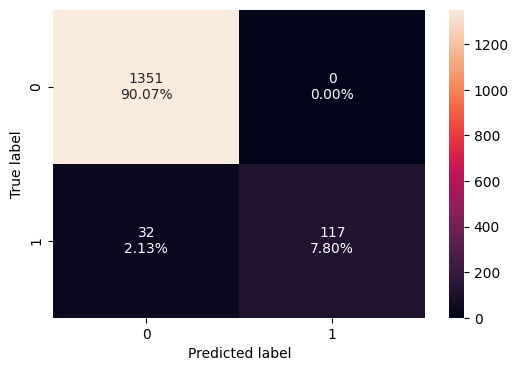

In [ ]:
confusion_matrix_sklearn(estimator,X_test, y_test)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.987714  0.873112   0.996552  0.930757

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.978667  0.785235        1.0  0.879699

Observation:
* Recall on training data has improved from 0.65 in our dTree1 model to 0.87
* Recall on testing data has improved from 0.60 to 0.79
* This result is much better than our last.

**GridSearch Pruned Tree Visualization**

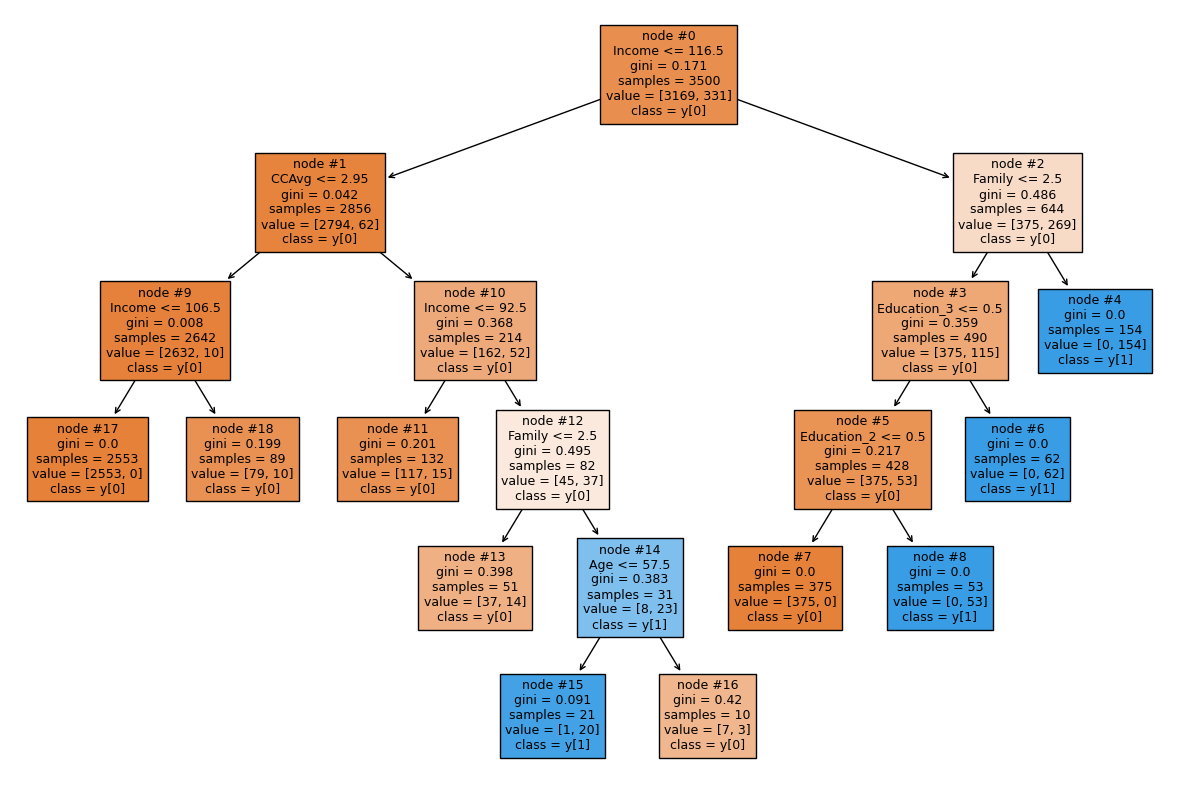

In [ ]:
plt.figure(figsize= (15,10))

tree.plot_tree(estimator, feature_names= feature_names, filled= True, fontsize= 9, node_ids= True, class_names= True)
plt.show()

**Feature Importances**

In [ ]:
# Text report
print(tree.export_text(estimator, feature_names= feature_names, show_weights= True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [37.00, 14.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- Age <= 57.50
|   |   |   |   |   |--- weights: [1.00, 20.00] class: 1
|   |   |   |   |--- Age >  57.50
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [0.00, 62.00] class: 1
|   |--- Family >  2.

In [ ]:
# Ranked importances
print(pd.DataFrame(estimator.feature_importances_, columns= ["Imp"], index= X_train.columns).sort_values(by= 'Imp', ascending= False))

                         Imp
Income              0.337681
Family              0.275581
Education_2         0.175687
Education_3         0.157286
CCAvg               0.042856
Age                 0.010908
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


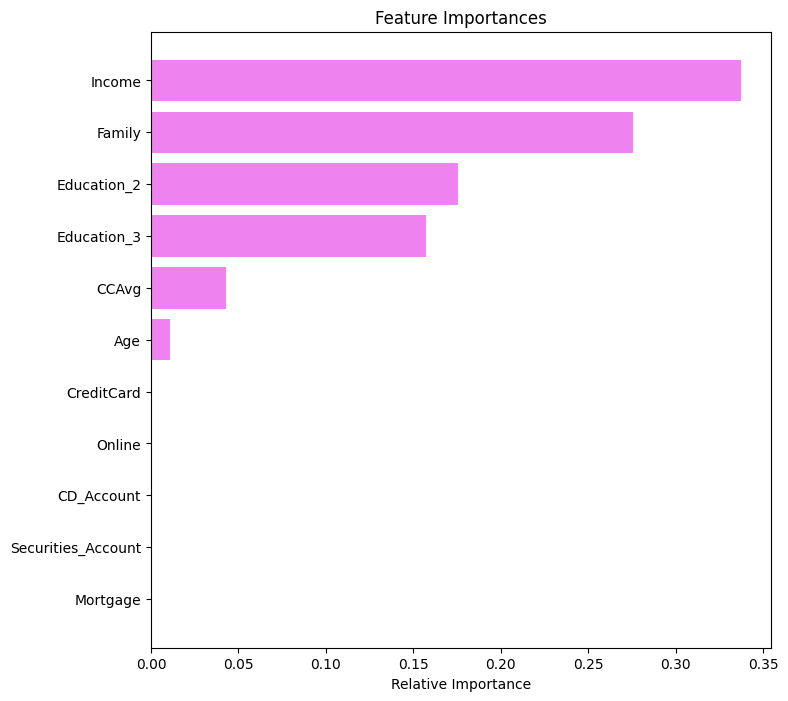

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize= (8,8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color= "violet", align= "center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

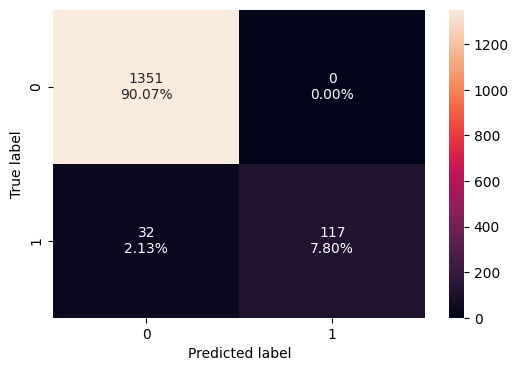

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.978667  0.785235        1.0  0.879699

Observation: This GridSearch pruned tree has the same ordered values as our initial tree.

# Cost Complexity Pruning Section

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000186    0.001114
2     0.000238    0.001590
3     0.000250    0.002090
4     0.000268    0.002626
5     0.000268    0.003699
6     0.000272    0.004244
7     0.000275    0.005344
8     0.000276    0.005897
9     0.000381    0.006278
10    0.000527    0.006805
11    0.000625    0.007430
12    0.000700    0.008130
13    0.000762    0.009654
14    0.000769    0.012731
15    0.000882    0.016260
16    0.000940    0.017200
17    0.001305    0.018505
18    0.001647    0.020153
19    0.002333    0.022486
20    0.002407    0.024893
21    0.003294    0.028187
22    0.006473    0.034659
23    0.025146    0.084951
24    0.039216    0.124167
25    0.047088    0.171255

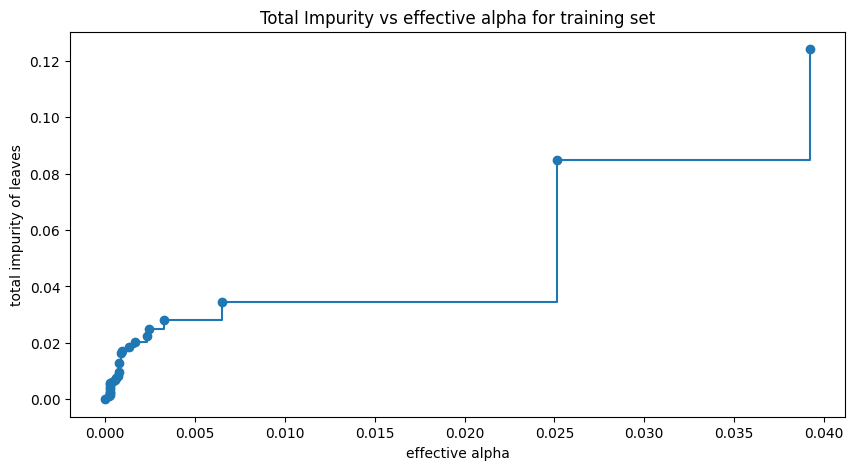

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Now, let's train a decision tree using the effective alphas.
* The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


We will remove the last element in CLFs and CCP_Alphas as they contain only 1 node.
* Below you will see that the number of nodes and tree depth decreases as the alpha value increases.

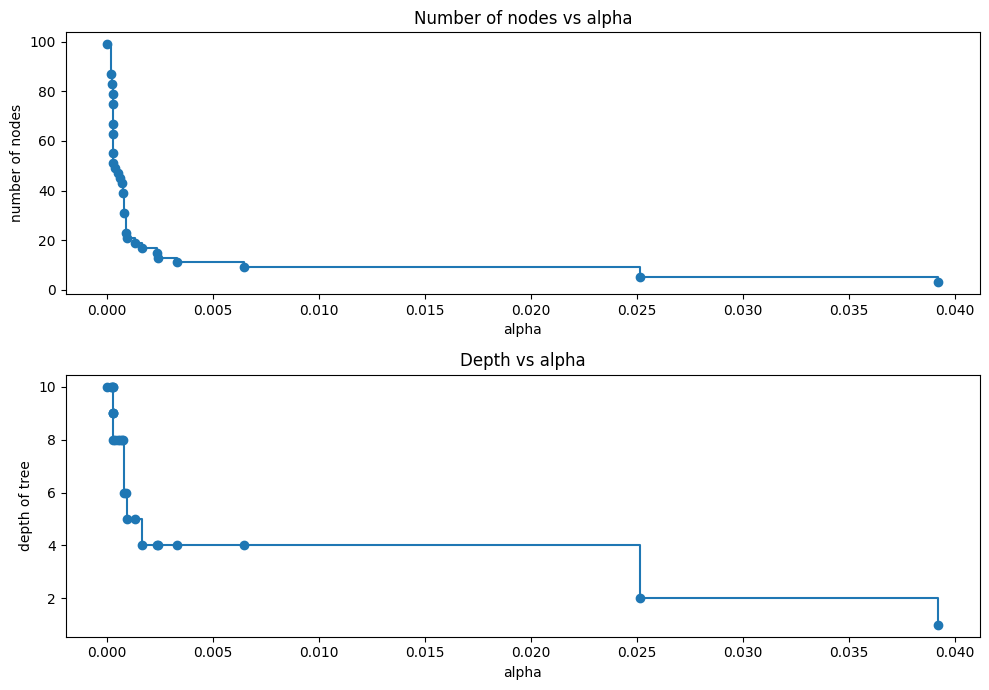

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Recall Training Section

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

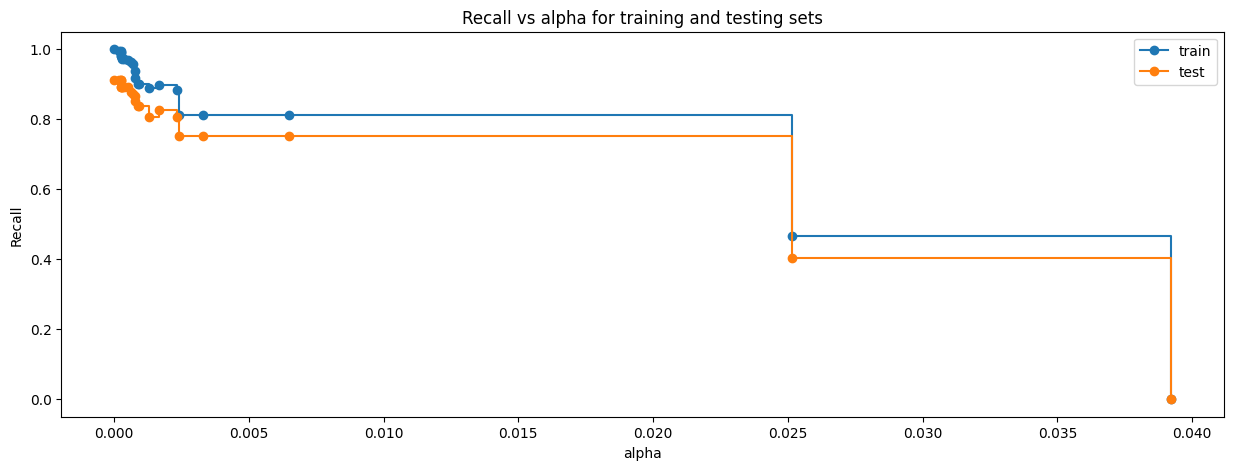

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


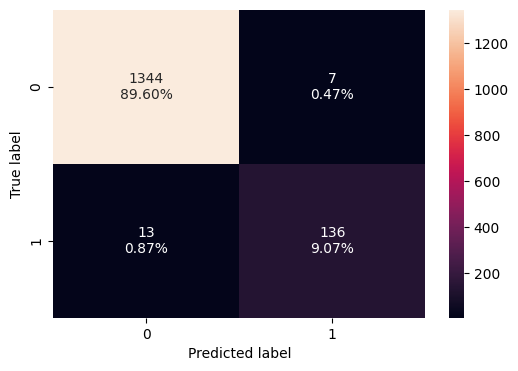

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(best_model, X_train, y_train)
decision_tree_post_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(best_model, X_test, y_test)
decision_tree_post_test

Accuracy    Recall  Precision        F1
0  0.986667  0.912752   0.951049  0.931507

Observation: Post-pruning appears to give us the highest  if this model is actually working
* Overfit model had a 90% Recall
* Our first pre-pruned tree had a 60% Recall
* Our GridSearch pruned tree had a 79% Recall
* This model seems to have a Recall value of 91%

**Post-pruning Decision Tree Visualization**

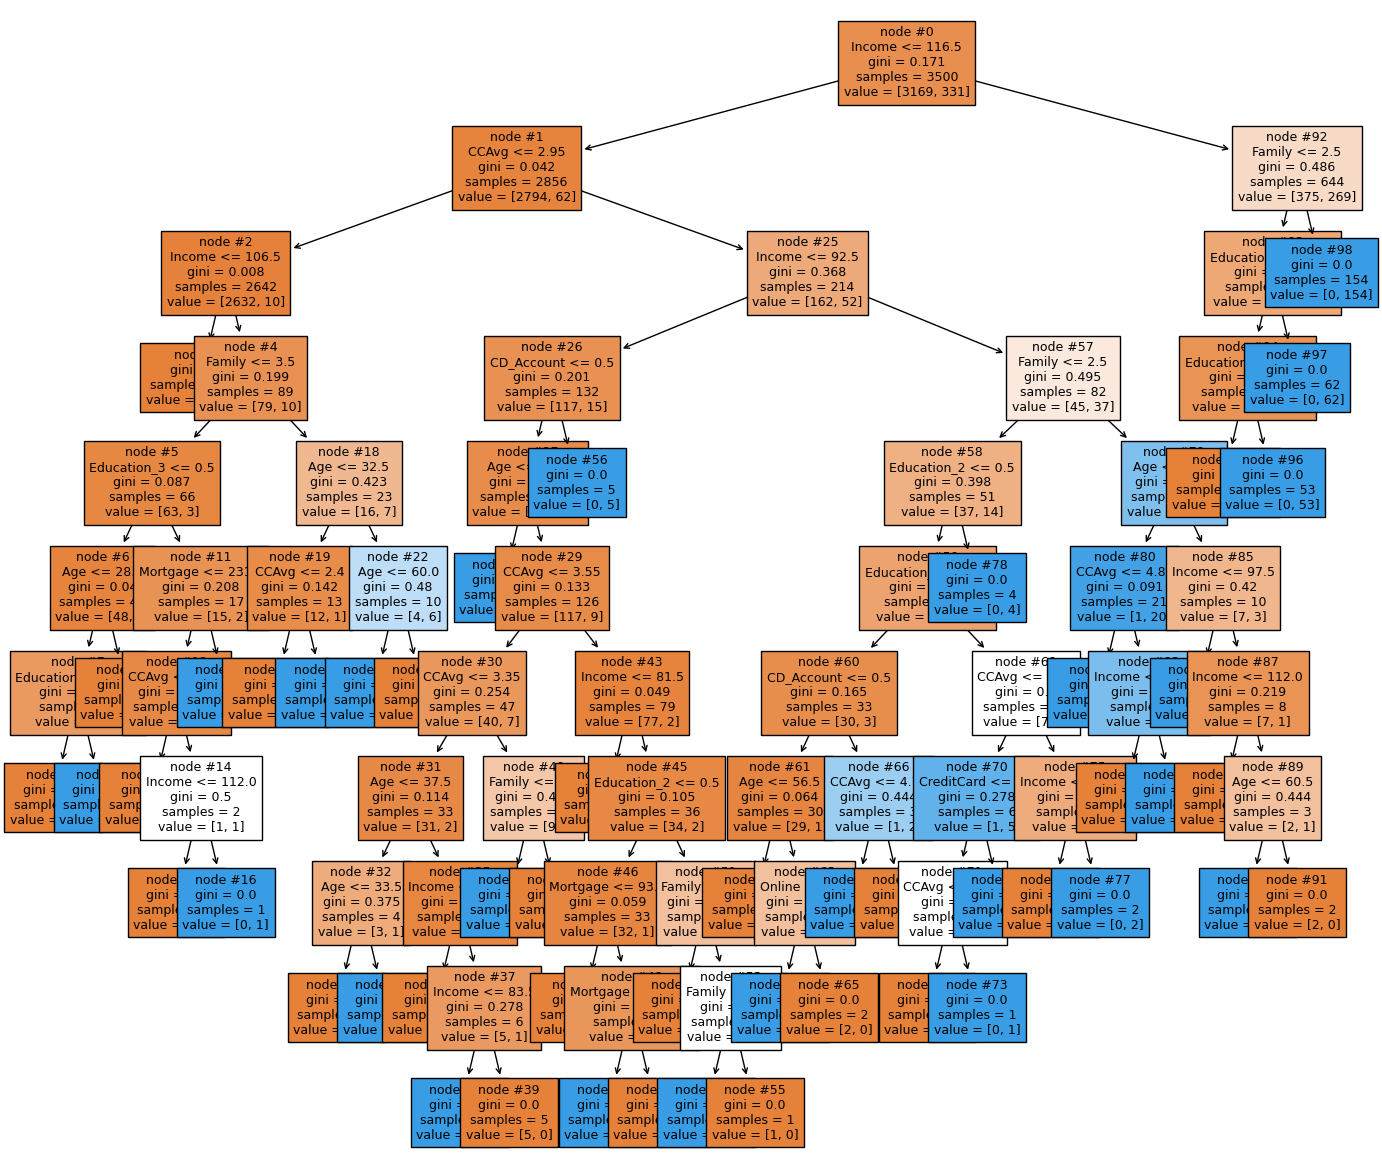

In [ ]:
plt.figure(figsize= (17,15))
tree.plot_tree(best_model, feature_names= feature_names, filled= True, fontsize= 9, node_ids= True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- weights: [43.00, 0.00] class: 0
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- Mortgage <= 231.00
|   |   |   |   |   |   |--- CCAvg <= 1.95
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  1.95
|   |   |   |   |   |   |   |--- Income <= 112.00
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  112.00
|   

In [ ]:
# Ranked feature inportance
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Income              0.315198
Family              0.259811
Education_2         0.166192
Education_3         0.144605
CCAvg               0.055184
Age                 0.032404
CD_Account          0.017273
Mortgage            0.005996
Online              0.002224
CreditCard          0.001112
Securities_Account  0.000000


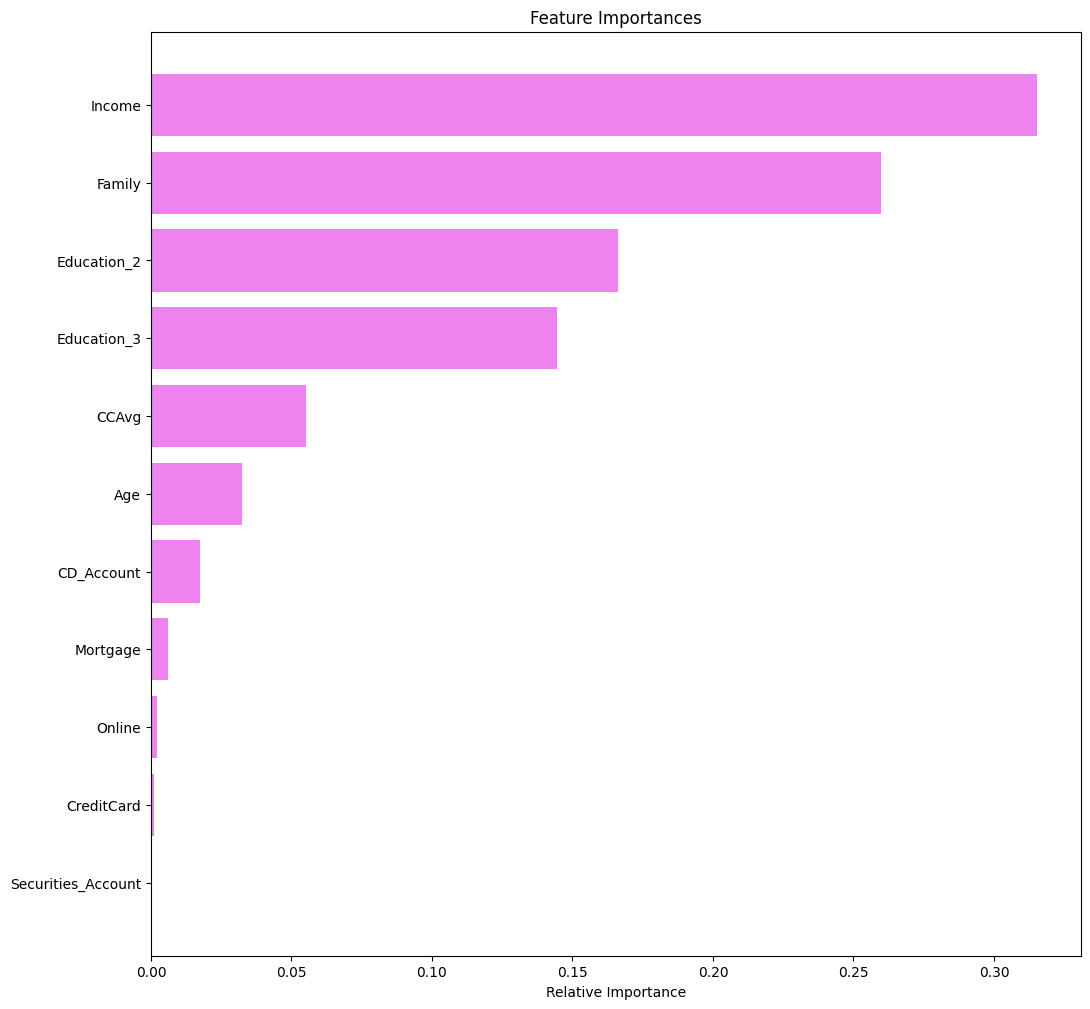

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Model Comparison and Final Model Selection

In [ ]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without pruning",
    "Decision Tree max depth pruning ",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree without pruning  Decision Tree max depth pruning   \
Accuracy                             1.0                          0.967143   
Recall                               1.0                          0.652568   
Precision                            1.0                          1.000000   
F1                                   1.0                          0.789762   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.987714                           1.0  
Recall                        0.873112                           1.0  
Precision                     0.996552                           1.0  
F1                            0.930757                           1.0

In [ ]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without pruning",
    "Decision Tree max depth pruning",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree without pruning  Decision Tree max depth pruning  \
Accuracy                        0.986667                         0.960667   
Recall                          0.912752                         0.604027   
Precision                       0.951049                         1.000000   
F1                              0.931507                         0.753138   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.978667                      0.986667  
Recall                        0.785235                      0.912752  
Precision                     1.000000                      0.951049  
F1                            0.879699                      0.931507

## Actionable Insights and Business Recommendations


# Insights from the data:
* The highest personal loan interest from those with a mortgage value is customers with mortgage loan values between 0-200k.
* The highest loan interest taking into consideration income levels is those with incomes between $130K-180K.
* The highest personal loan interest taking into consideration level of education is those in education categories 2 and 3.
* Families of more than 2 members are more likely to accept a personal loan
* Those with a Securities account or CD are more likely to accept a personal loan.
* The most ideal age range for interest in a personal loan is between 35-55 yrs.
* The 4 greatest contributors to the likelihood of accepting a personal loan are Income, Family size, and Education levels 2 & 3

# Business Recommendations
* The ZIPCode column could potentially be a very valuable information source. However, there isn't nearly enough data in this set for it to make any difference in any of the predictive models. I would recommend a bigger data set if one is available.
* The model with the highest test Recall value is the pre-pruned model. We're most concerned about True positive predictions and thus want to limit False negatives. This model does the best on Recall with a 79% success rate. It also scores really well on Accuracy: 98%, Precision: 100% and F1: 88%.
